In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns; sns.set()
from sklearn.linear_model import SGDClassifier 
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import *
import time

%matplotlib inline

In [2]:
cd code

/Users/kazi/Desktop/syntaxerror-mlpp2018/code


In [3]:
#This loop only using all the possible data
df = pd.read_csv('final_data.csv')

In [4]:
df["booking_date"].max()

'2016-04-30 00:00:00'

In [5]:
df.shape

(24855, 27)

In [6]:
acs =pd.read_csv('fips_acs.csv')

In [7]:
acs.columns

Index(['fips', 'per_capita_income', 'poverty_stat', 'household_income',
       'mortgage_stat', 'school_enrollment_16-19', 'own_children_under18',
       'SSI_income', 'grandparent_care', 'military_service', 'education_25',
       'property_value_occupied', 'retirement_income', 'rent_over_income',
       'zip'],
      dtype='object')

In [8]:
df.zip.nunique()

1208

In [9]:
acs.zip.nunique()

244

In [10]:
df=df.dropna(subset=['zip'])

In [11]:
df = acs.merge(df, how="inner")

In [12]:
df.shape

(22923, 41)

In [13]:
df.columns

Index(['fips', 'per_capita_income', 'poverty_stat', 'household_income',
       'mortgage_stat', 'school_enrollment_16-19', 'own_children_under18',
       'SSI_income', 'grandparent_care', 'military_service', 'education_25',
       'property_value_occupied', 'retirement_income', 'rent_over_income',
       'zip', 'mni_no', 'dedupe_id', 'dob', 'sex', 'race', 'mar_stat', 'city',
       'state', 'case_no', 'case_type', 'booking_no', 'arresting_agency',
       'arresting_agency_type', 'booking_date', 'release_date', 'bail_type',
       'bail_amt', 'bailed_out', 'pri_dx_value', 'refferal_source',
       'mh_treatment', 're_entry', 'age', 'after_released', 'within_one',
       'within_two'],
      dtype='object')

In [14]:
#Check the prob of re-entry within one year
df['within_one'].sum()/df.shape[0]

0.2261047855865288

In [15]:
#Check the prob of re-entry within two year
df['within_two'].sum()/df.shape[0]

0.281158661606247

In [16]:
df = df.drop(['re_entry', 'age', 'mni_no', 'dedupe_id', 'dob', 'state', 'city', 'fips', 'zip', 'release_date', 'case_no', 'booking_no', 'pri_dx_value',
       'refferal_source'], axis=1)

In [17]:
df.columns

Index(['per_capita_income', 'poverty_stat', 'household_income',
       'mortgage_stat', 'school_enrollment_16-19', 'own_children_under18',
       'SSI_income', 'grandparent_care', 'military_service', 'education_25',
       'property_value_occupied', 'retirement_income', 'rent_over_income',
       'sex', 'race', 'mar_stat', 'case_type', 'arresting_agency',
       'arresting_agency_type', 'booking_date', 'bail_type', 'bail_amt',
       'bailed_out', 'mh_treatment', 'after_released', 'within_one',
       'within_two'],
      dtype='object')

In [18]:
df.head()

per_capita_income  poverty_stat  household_income  mortgage_stat  \
0            26836.0          1118               456            364   
1            26836.0          1118               456            364   
2            26836.0          1118               456            364   
3            26836.0          1118               456            364   
4            26836.0          1118               456            364   

   school_enrollment_16-19  own_children_under18  SSI_income  \
0                      167                   175         456   
1                      167                   175         456   
2                      167                   175         456   
3                      167                   175         456   
4                      167                   175         456   

   grandparent_care  military_service  education_25    ...      \
0               692                66           776    ...       
1               692                66           776    ...       
2               692                66           776    ...       
3               692                66           776    ...       
4               692                66           776    ...       

                      arresting_agency  arresting_agency_type  \
0  JOHNSON COUNTY SHERIFF'S DEPARTMENT         COUNTY SHERIFF   
1  JOHNSON COUNTY SHERIFF'S DEPARTMENT         COUNTY SHERIFF   
2                   OVERLAND PARK P.D.                   CITY   
3  JOHNSON COUNTY SHERIFF'S DEPARTMENT         COUNTY SHERIFF   
4  JOHNSON COUNTY SHERIFF'S DEPARTMENT         COUNTY SHERIFF   

          booking_date bail_type bail_amt bailed_out mh_treatment  \
0  2013-12-30 00:00:00       SUR   1500.0          1            0   
1  2013-11-10 00:00:00       SUR  15000.0          1            1   
2  2012-10-10 00:00:00       SUR  20000.0          1            1   
3  2011-05-26 00:00:00       SUR   5000.0          1            1   
4  2011-06-27 00:00:00       SUR   5000.0          1            1   

  after_released within_one within_two  
0          586.0          0          1  
1          603.0          0          1  
2          -41.0          1          1  
3            7.0          1          1  
4           32.0          1          1  

[5 rows x 27 columns]

In [19]:
dummy_vals = ['sex', 'race','mar_stat', 'case_type', 'arresting_agency', 'arresting_agency_type', 'bail_type' ]

In [20]:
#generate dummy variable for specific column
def getting_dummy(df, col):
    '''
    Helper function to create dummy variables in dataframe for specific column
    This function will return dataframe
    '''
    dummies = pd.get_dummies(df[col]).rename(columns=lambda x: str(col)+ str(x))
    df = pd.concat([df, dummies], axis=1)
    df.drop([col], inplace=True, axis=1)
    return df

In [21]:
for dummy in dummy_vals:
    df = getting_dummy(df, dummy)

In [22]:
'''
    #4 GenerateFeatures/Predictors: discretize a continuous variable 
def discrete_val(df, cols, bins=4):

    Helper function to discrete the continueous variable in dataframe into 4 bins
    This function will return dictionary mapping column name to the bin values

    for col in cols:
        new = col+'_binned'
        df[new] = pd.cut(df[col], bins, include_lowest=True, labels = range(0,bins))
        df.drop([col], inplace=True, axis=1)
    return df
'''

"\n    #4 GenerateFeatures/Predictors: discretize a continuous variable \ndef discrete_val(df, cols, bins=4):\n\n    Helper function to discrete the continueous variable in dataframe into 4 bins\n    This function will return dictionary mapping column name to the bin values\n\n    for col in cols:\n        new = col+'_binned'\n        df[new] = pd.cut(df[col], bins, include_lowest=True, labels = range(0,bins))\n        df.drop([col], inplace=True, axis=1)\n    return df\n"

In [29]:
def discrete_val(df, variable, label, fix_value):
    '''
    ANDREW FUNCTION
    Create a bin column for a given variable, derived by using the 
    description of the column to determine the min, 25, 50, 75 and max
    of the column. Then categorize each value in the original variable's
    column in the new column, labeled binned_<variable>, with 1,2,3,4
    Ranging from min to max
    Inputs:
    df: A panda dataframe
    variable: A string, which is a column in df
    label: A string
    fix_value: Either prefix or suffix
    Outputs:
    df: A panda dataframe
    '''
    variable_min = df[variable].min()
    variable_25 = df[variable].quantile(q = 0.25)
    variable_50 = df[variable].quantile(q = 0.50)
    variable_75 = df[variable].quantile(q = 0.75)
    variable_max = df[variable].max()
    
    bin = [variable_min, variable_25, variable_50, variable_75, variable_max]
    unique_values = len(set(bin))
    
    label_list = []
    iterator = 0
    for x in range(1, unique_values):
        iterator += 1
        label_list.append(iterator)
    
    if fix_value == 'prefix':
        bin_label = label + variable
    elif fix_value == 'suffix':
        bin_label = variable + label
    
    df[bin_label] = pd.cut(df[variable], bins = bin, include_lowest = True, labels = label_list, duplicates = 'drop')
    df.drop([variable], inplace = True, axis=1)
    
    return df

In [30]:
df.head()

per_capita_income  poverty_stat  household_income  mortgage_stat  \
0            26836.0          1118               456            364   
1            26836.0          1118               456            364   
2            26836.0          1118               456            364   
3            26836.0          1118               456            364   
4            26836.0          1118               456            364   

   school_enrollment_16-19  own_children_under18  SSI_income  \
0                      167                   175         456   
1                      167                   175         456   
2                      167                   175         456   
3                      167                   175         456   
4                      167                   175         456   

   grandparent_care  military_service  education_25      ...       \
0               692                66           776      ...        
1               692                66           776      ...        
2               692                66           776      ...        
3               692                66           776      ...        
4               692                66           776      ...        

   arresting_agency_typeCOUNTY PARK DISTRICT  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   arresting_agency_typeCOUNTY SHERIFF  arresting_agency_typeOTHER AGENCY  \
0                                    1                                  0   
1                                    1                                  0   
2                                    0                                  0   
3                                    1                                  0   
4                                    1                                  0   

  arresting_agency_typeSCHOOL  arresting_agency_typeSTATE  bail_typeCA  \
0                           0                           0            0   
1                           0                           0            0   
2                           0                           0            0   
3                           0                           0            0   
4                           0                           0            0   

   bail_typeGPS  bail_typeORCD  bail_typePR  bail_typeSUR  
0             0              0            0             1  
1             0              0            0             1  
2             0              0            0             1  
3             0              0            0             1  
4             0              0            0             1  

[5 rows x 67 columns]

In [31]:
binv = ['per_capita_income', 'poverty_stat', 'household_income',
       'mortgage_stat', 'school_enrollment_16-19', 'own_children_under18',
       'SSI_income', 'grandparent_care', 'military_service', 'education_25',
       'property_value_occupied', 'retirement_income', 'rent_over_income','bail_amt']

#binv = ['per_capita_income']
#df = discrete_val(df, binv, 6)

for variable in binv:
    df = discrete_val (df, variable, '_bin', 'suffix')

In [23]:
dum = [ 'per_capita_income_binned',
 'poverty_stat_binned',
 'household_income_binned',
 'mortgage_stat_binned',
 'school_enrollment_16-19_binned',
 'own_children_under18_binned',
 'SSI_income_binned',
 'grandparent_care_binned',
 'military_service_binned',
 'education_25_binned',
 'property_value_occupied_binned',
 'retirement_income_binned',
 'rent_over_income_binned',
 'bail_amt_binned']

In [24]:
for dummy in dum:
    df = getting_dummy(df, dummy)

In [32]:
indepv = list(df.columns)

In [33]:
indepv.remove('after_released')

In [34]:
indepv.remove('within_one')

In [35]:
indepv.remove('within_two')

In [ ]:
indepv.remove('')

In [36]:
indepv

['booking_date',
 'bailed_out',
 'mh_treatment',
 'sexFEMALE',
 'sexMALE',
 'raceAMERICAN INDIAN OR ALASKA NATIVE',
 'raceASIAN',
 'raceBLACK OR AFRICAN AMERICAN',
 'raceWHITE',
 'mar_statA',
 'mar_statD',
 'mar_statM',
 'mar_statN',
 'mar_statS',
 'mar_statU',
 'mar_statW',
 'mar_statY',
 'case_typeCR',
 'case_typeDV',
 'case_typeJV',
 'arresting_agencyFAIRWAY P.D.',
 'arresting_agencyGARDNER P.D.',
 'arresting_agencyJOHNSON COUNTY PARK PATROL',
 "arresting_agencyJOHNSON COUNTY SHERIFF'S DEPARTMENT",
 'arresting_agencyKANSAS HIGHWAY PATROL',
 'arresting_agencyLAKE QUIVIRA P.D.',
 'arresting_agencyLEAWOOD P.D.',
 'arresting_agencyLENEXA P.D.',
 'arresting_agencyMERRIAM P.D.',
 'arresting_agencyMISSION P.D.',
 'arresting_agencyOLATHE P.D.',
 'arresting_agencyOTHER AGENCY',
 'arresting_agencyOVERLAND PARK P.D.',
 'arresting_agencyPRAIRIE VILLAGE P.D.',
 'arresting_agencyROELAND PARK P.D.',
 'arresting_agencySHAWNEE MISSION SCHOOL SECURITY',
 'arresting_agencySHAWNEE P.D.',
 'arresting_ag

In [37]:
def temporal_split(df, time_col, start_time, mid_time, end_time):
    train = df[(df[time_col] >= start_time) & (df[time_col] < mid_time) ]
    test = df[(df[time_col] >= mid_time)  & (df[time_col] < end_time)]
    train = train.drop([time_col], axis=1)
    test = test.drop([time_col], axis=1)
    return train, test

In [38]:
indepv.remove('booking_date')

In [39]:
def split_data(train, test, y):
    '''
    Split the data into training and testing set
    
    And save them to run try different models
    '''
    x_test = test[indepv] 
    x_train = train[indepv]
    y_test = test[y]
    y_train = train[y]
    
    return x_train, x_test, y_train, y_test

In [40]:
train, test = temporal_split(df, 'booking_date', '2010-01-01', '2015-07-01', '2018-01-01' )

In [41]:
train.shape

(19516, 66)

In [42]:
test.shape

(3407, 66)

In [43]:
clfs = {'RF': RandomForestClassifier(),
    'Boost': AdaBoostClassifier(DecisionTreeClassifier(max_depth=1)),
    'Logit': LogisticRegression(),
    'SVM': SVC(probability=True, random_state=0),
    'Tree': DecisionTreeClassifier(),
    'Bag': BaggingClassifier(),
    'KNN': KNeighborsClassifier(),
    'ET': ExtraTreesClassifier(n_estimators=10, n_jobs=-1, criterion='entropy'),
    'NB': GaussianNB()}

small_grid = {'RF':{'n_estimators': [10,100], 'max_depth': [5,50], 'max_features': ['sqrt','log2'],'min_samples_split': [2,10]},
    'Boost': {'algorithm': ['SAMME', 'SAMME.R'], 'n_estimators': [1,10,100,1000]},
    'Logit': {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10]},
    'SVM' :{'C' :[0.01,0.1,1,10],'kernel':['linear']},
    'Tree': {'criterion': ['gini', 'entropy'], 'max_depth': [5,10,20,50], 'max_features': ['sqrt','log2'],'min_samples_split': [2,5]},
    'Bag':{'n_estimators':[1,10,20,50], 'max_samples':[5,10], 'max_features': [5,10]},
    'KNN' :{'n_neighbors': [1,10,50],'weights': ['uniform','distance'],'algorithm': ['auto']},
    'ET': {'n_estimators': [10,100], 'criterion' : ['gini', 'entropy'] ,'max_depth': [5,50], 'max_features': ['sqrt','log2'],'min_samples_split': [2,10], 'n_jobs': [-1]},
    'NB' : {}}

In [44]:
def generate_binary_at_k(y_scores, k):
    '''
    Set first k% as 1, the rest as 0.
    '''
    cutoff_index = int(len(y_scores) * (k / 100.0))
    test_predictions_binary = [1 if x < cutoff_index else 0 for x in range(len(y_scores))]
    return test_predictions_binary

In [45]:
def scores_at_k(y_true, y_scores, k):
    '''
    For a given level of k, calculate corresponding
    precision, recall, and f1 scores.
    '''
    preds_at_k = generate_binary_at_k(y_scores, k)
    precision = round(precision_score(y_true, preds_at_k),4)
    recall = round(recall_score(y_true, preds_at_k), 4)
    f1 = round(f1_score(y_true, preds_at_k),4)
    return precision, recall, f1

In [46]:
def plot_precision_recall_n(y_true, y_score, model_name,  para = None):
    precision_curve, recall_curve, pr_thresholds = precision_recall_curve(y_true, y_score)
    precision_curve = precision_curve[:-1]
    recall_curve = recall_curve[:-1]
    pct_above_per_thresh = []
    number_scored = len(y_score)
    for value in pr_thresholds:
        num_above_thresh = len(y_score[y_score>=value])
        pct_above_thresh = num_above_thresh / float(number_scored)
        pct_above_per_thresh.append(pct_above_thresh)
    pct_above_per_thresh = np.array(pct_above_per_thresh)
    plt.clf()
    fig, ax1 = plt.subplots()
    ax1.plot(pct_above_per_thresh, precision_curve, 'b')
    ax1.set_xlabel('percent of population')
    ax1.set_ylabel('precision', color='b')
    ax2 = ax1.twinx()
    ax2.plot(pct_above_per_thresh, recall_curve, 'r')
    ax2.set_ylabel('recall', color='r')
    
    plt.title('2-class Precision-Recall curve for {} model: AUC={:.2f} \n with parameters: {}'.\
                        format(model_name, average_precision_score(y_true, y_score), para))
    

In [47]:
def plot(y_test, y_pred_probs, model, para = None):

    precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve for {} model: AUC={:.2f} \n with parameters: {}'.\
                        format(model, average_precision_score(y_test, y_pred_probs), para))
    plt.show()

In [48]:
def clf_loop(models, x_train, x_test, y_train, y_test, grid=small_grid):
    '''
    Run model with given params on x and y
    and print out the scores for comparison
    '''
    results_df = pd.DataFrame(columns=('model_type', 'parameters', 'accuracy','auc-roc', 'precision', 'time', 'precision,recall,f1 at_5',
     'precision,recall,f1 at_10', 'precision,recall,f1 at_20', 'precision,recall,f1 at_30', 'precision,recall,f1 at_50'))
    for index, clf in enumerate([clfs[x] for x in models]):
        model_params = grid[models[index]]
        for p in ParameterGrid(model_params):
            try:
                start = time.time()
                clf.set_params(**p)
                y_pred_probs = clf.fit(x_train, y_train).predict_proba(x_test)[:,1]
                accuracy = clf.score(x_test, y_test)
                end = time.time()
                #Zip, unzip to ensure corresponding order
                y_pred_probs_sorted, y_test_sorted = zip(*sorted(zip(y_pred_probs, y_test), reverse=True))

                results_df.loc[len(results_df)] = [models[index], p, round(accuracy, 4),
                                             round(roc_auc_score(y_test, y_pred_probs),4),
                                             round(average_precision_score(y_test, y_pred_probs),4),
                                             round(end-start, 4) ,                                                    
                                             scores_at_k(y_test_sorted,y_pred_probs_sorted,5.0),
                                             scores_at_k(y_test_sorted,y_pred_probs_sorted,10.0),
                                             scores_at_k(y_test_sorted,y_pred_probs_sorted,20.0),
                                             scores_at_k(y_test_sorted,y_pred_probs_sorted,30.0),
                                             scores_at_k(y_test_sorted,y_pred_probs_sorted,50.0)]

                plot(y_test, y_pred_probs, models[index],p)
                
            except IndexError as e:
                print(e)
                continue
    return results_df

In [49]:
#Running classifiers to predict if the person re-enter within one years
x_train, x_test, y_train, y_test = split_data(train, test, 'within_one')

In [50]:
x_train, x_test, y_train2, y_test2 = split_data(train, test, 'within_two')

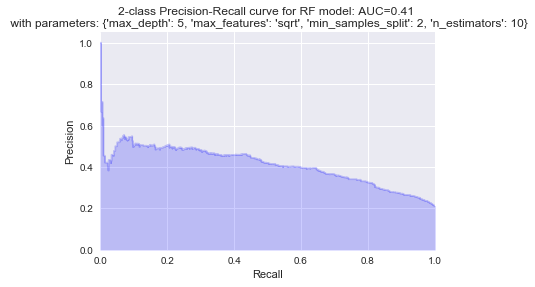

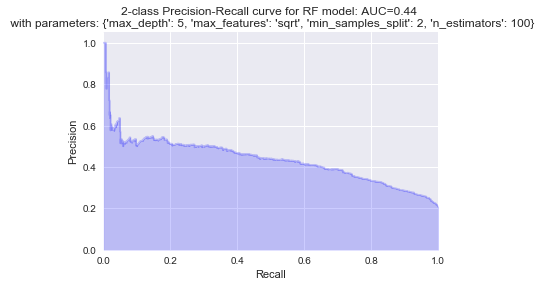

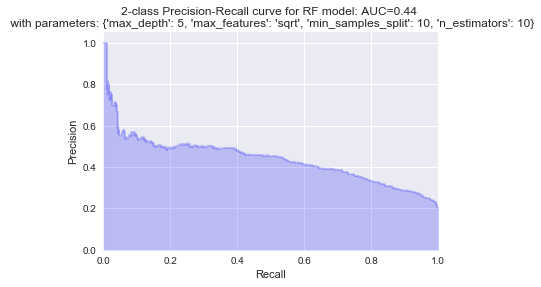

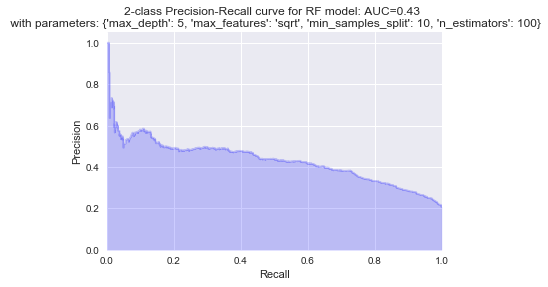

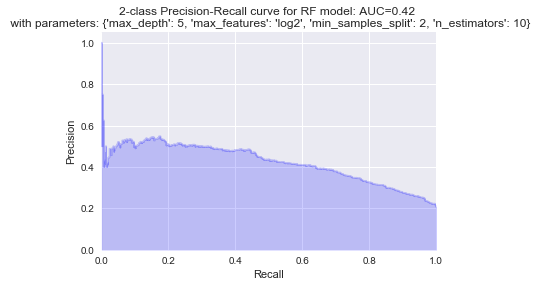

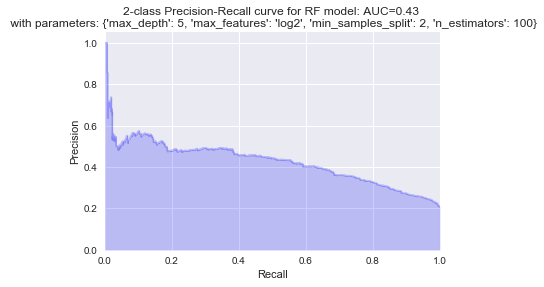

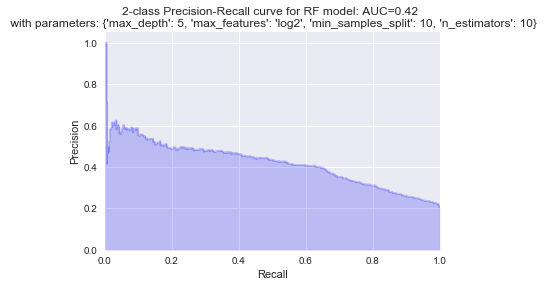

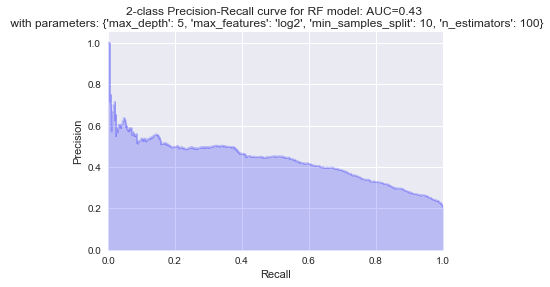

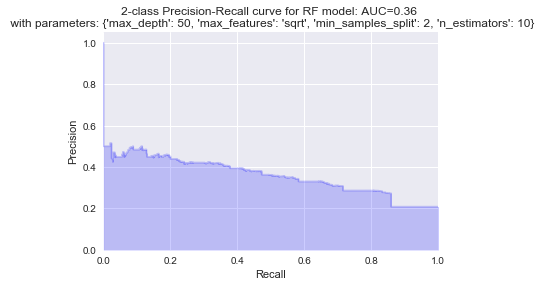

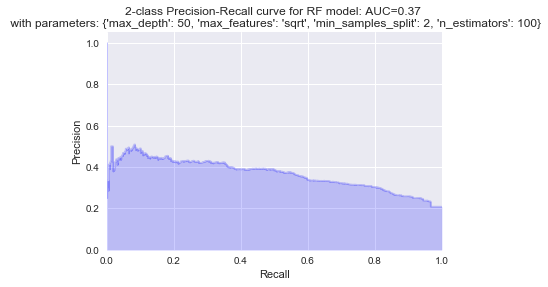

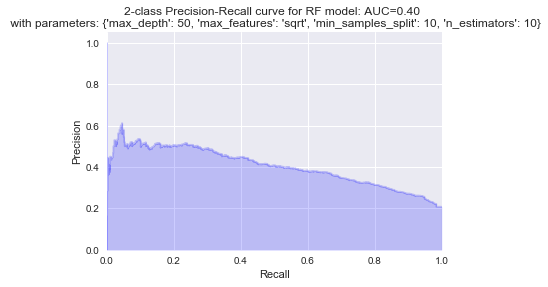

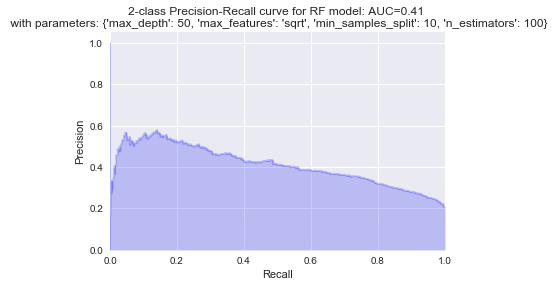

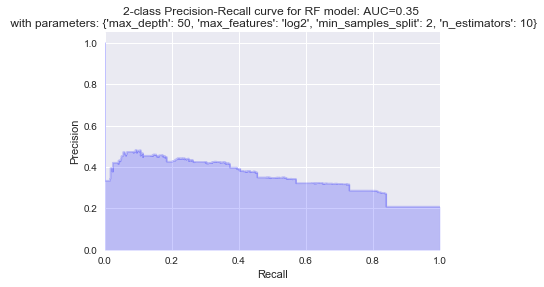

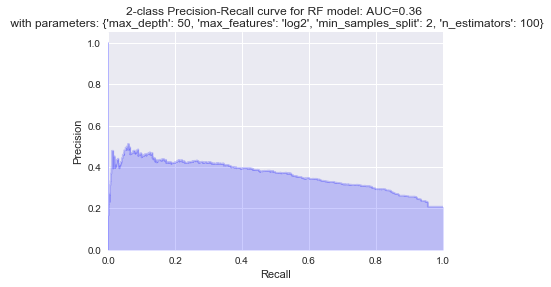

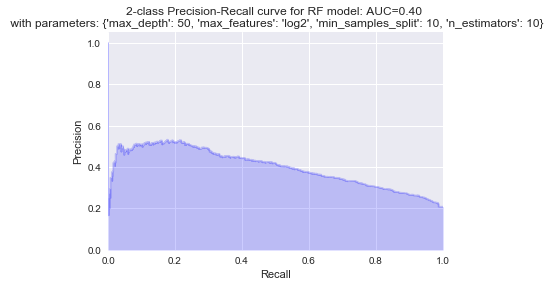

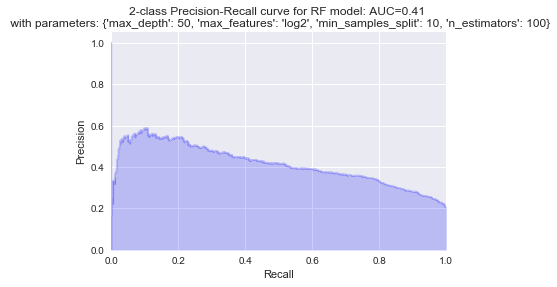

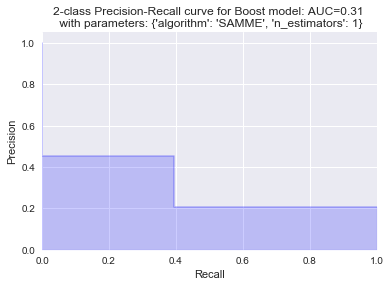

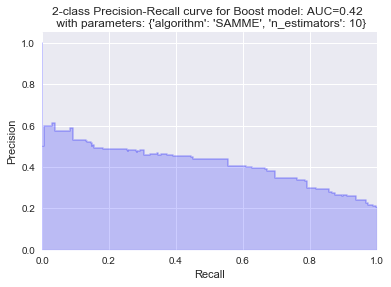

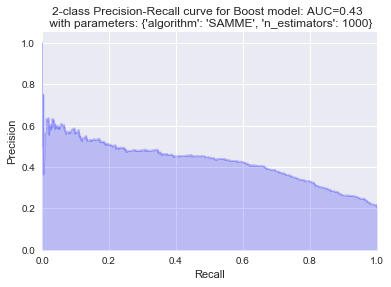

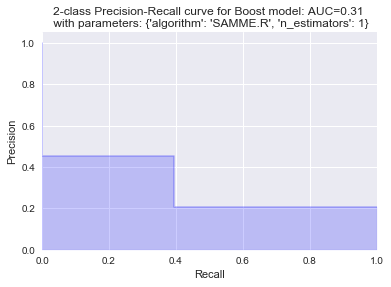

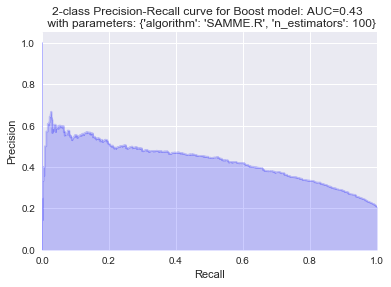

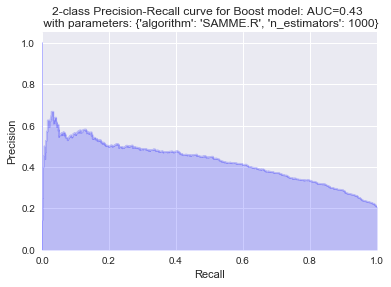

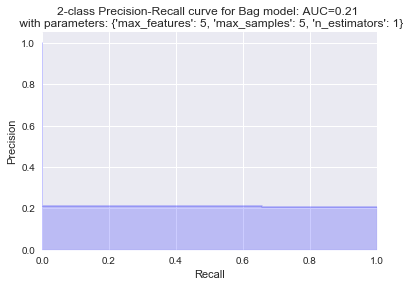

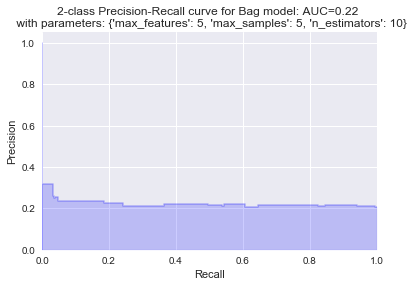

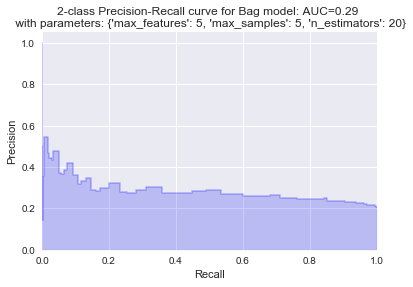

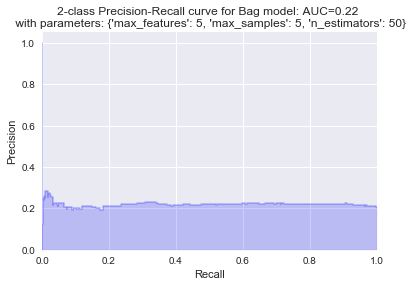

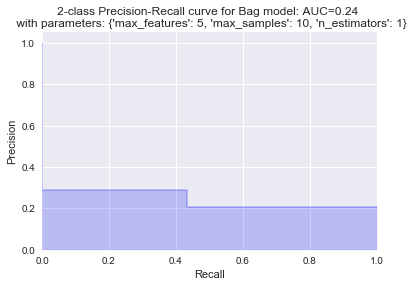

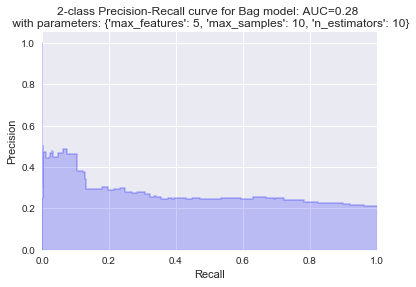

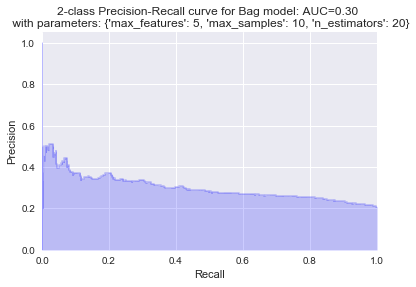

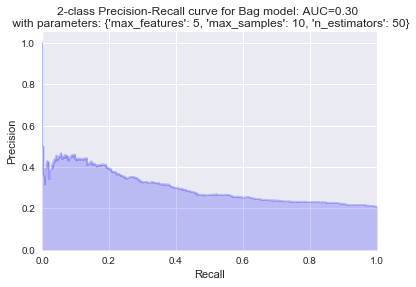

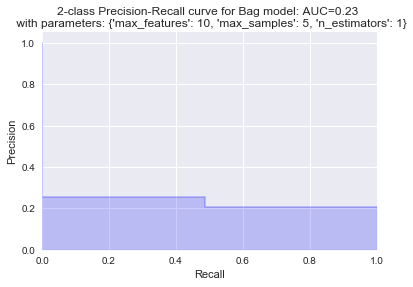

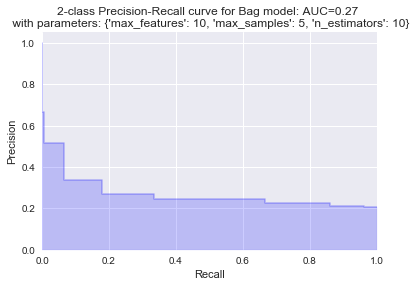

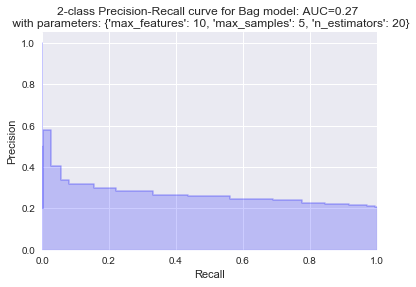

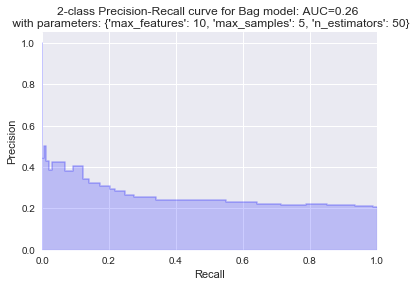

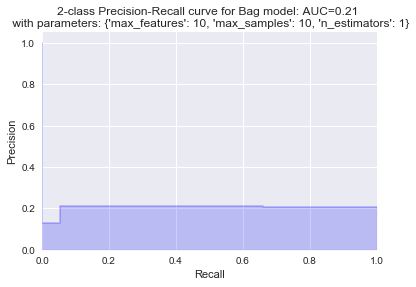

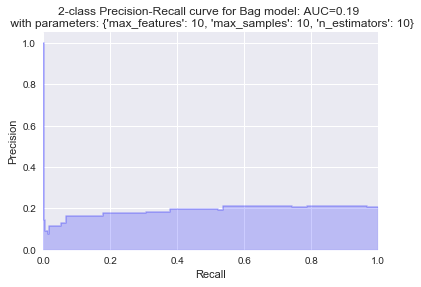

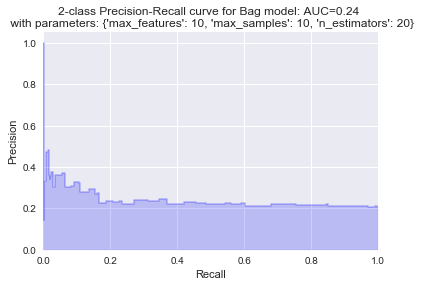

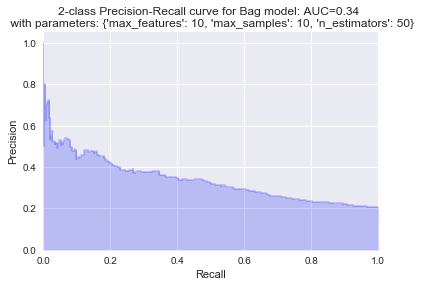

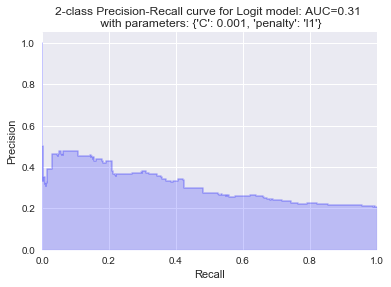

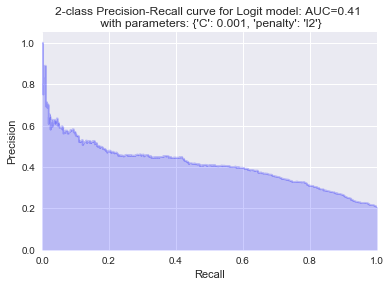

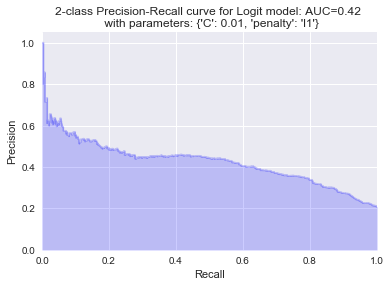

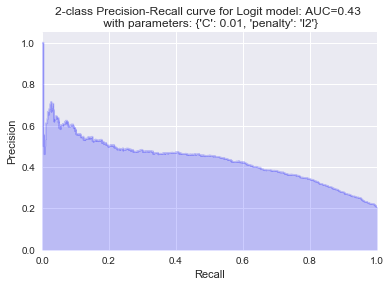

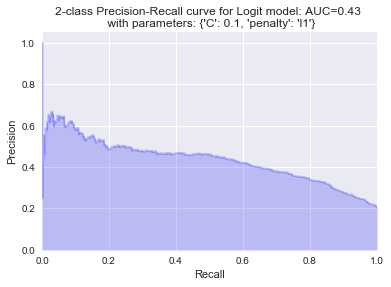

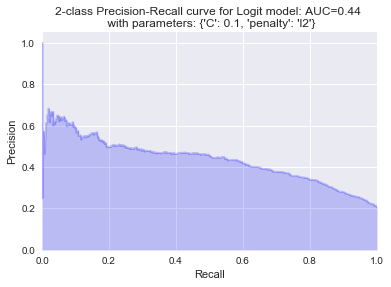

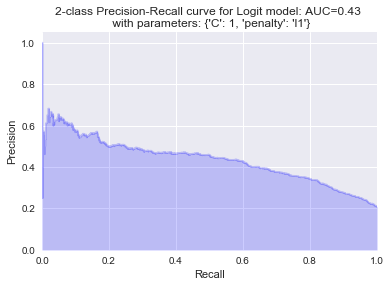

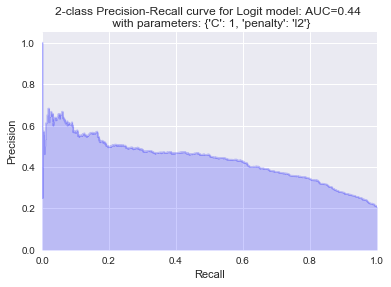

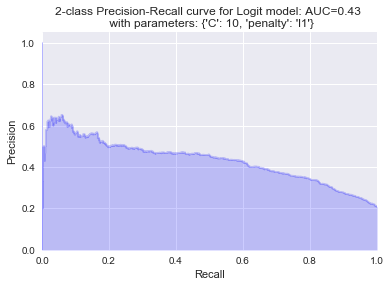

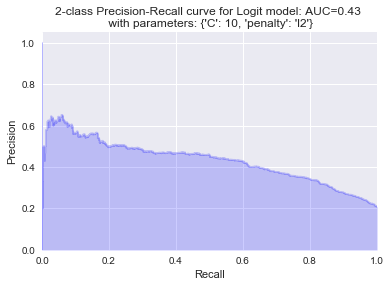

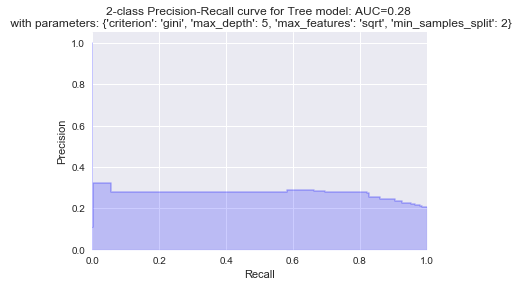

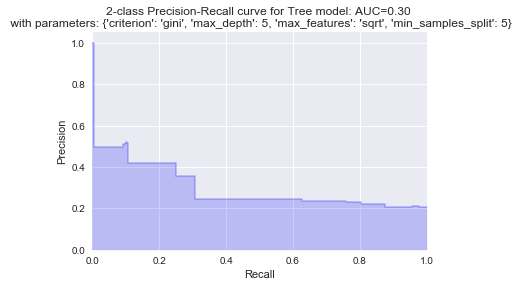

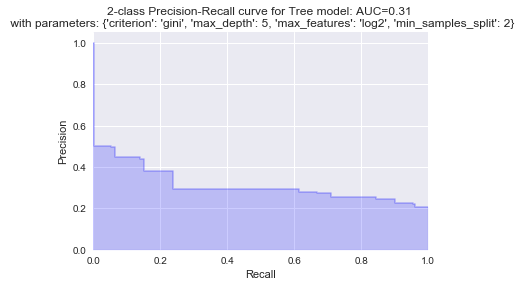

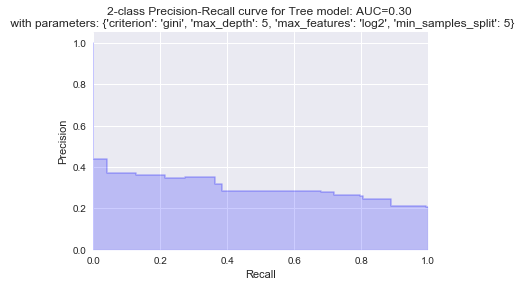

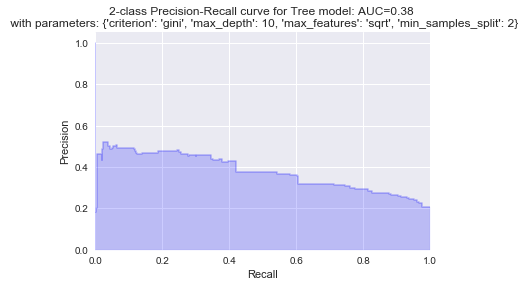

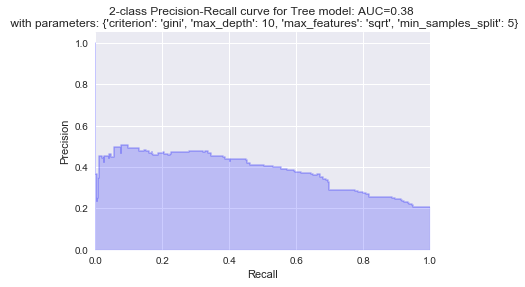

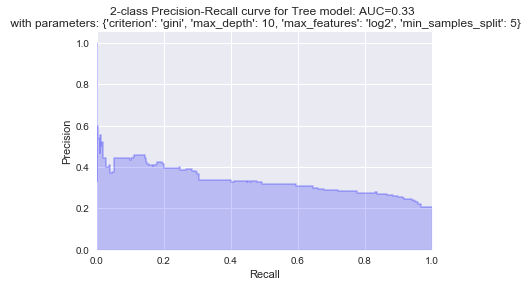

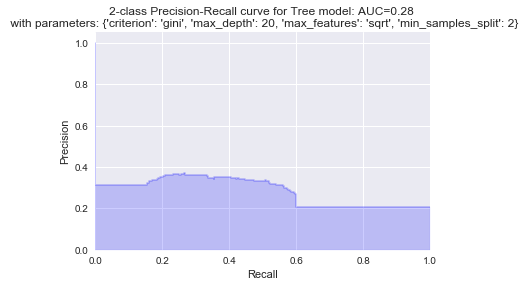

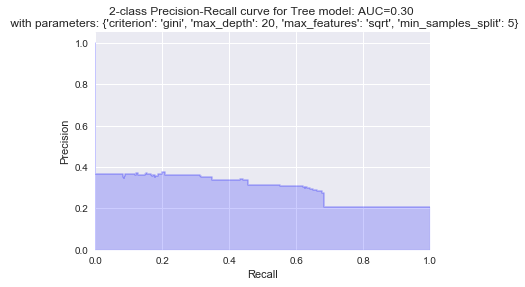

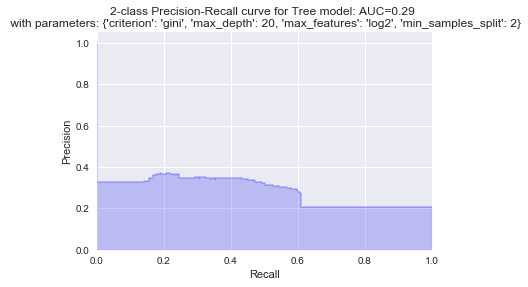

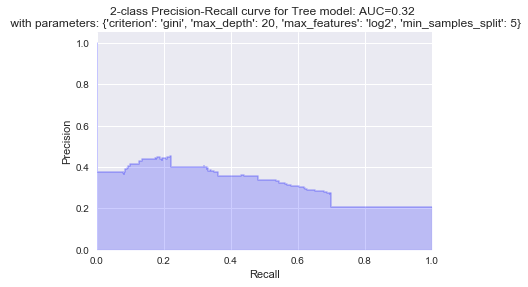

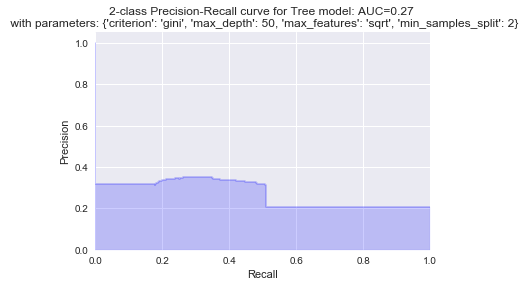

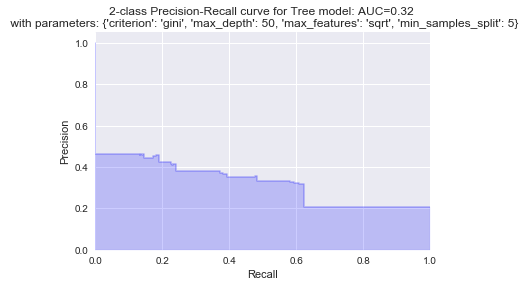

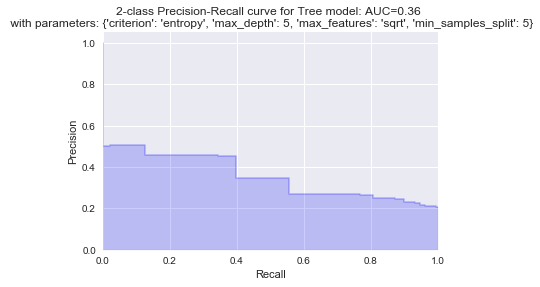

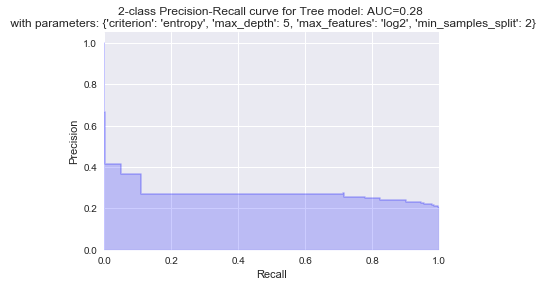

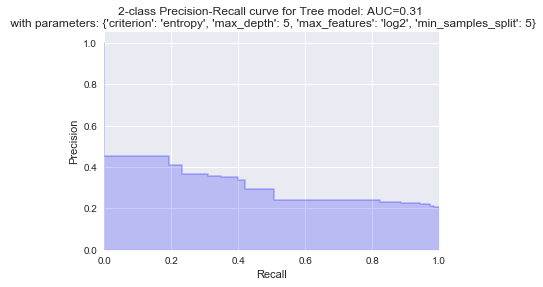

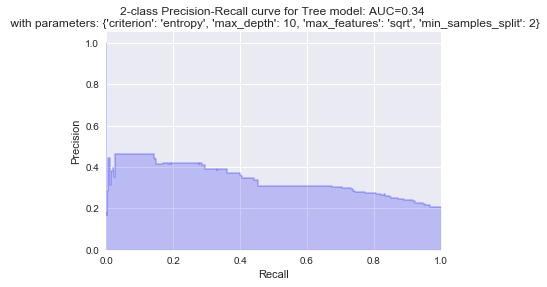

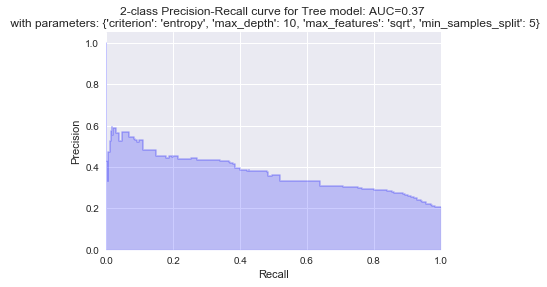

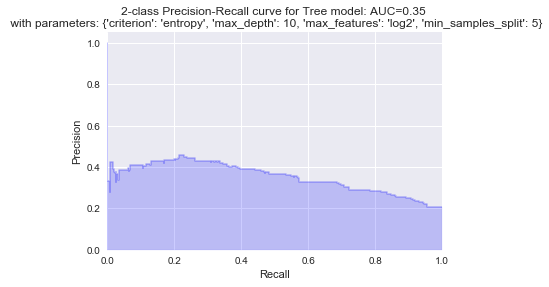

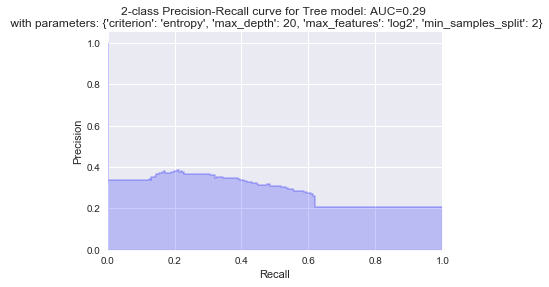

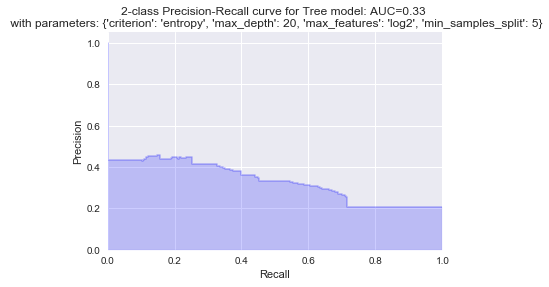

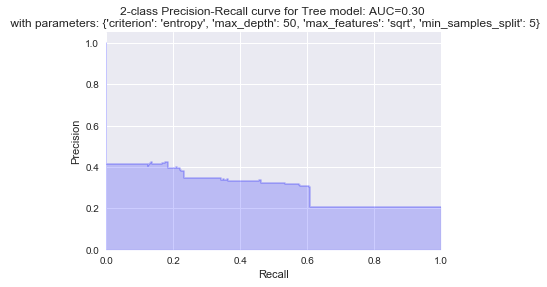

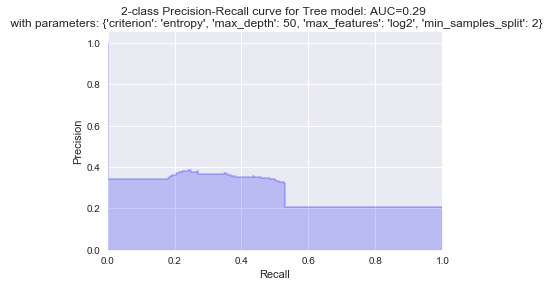

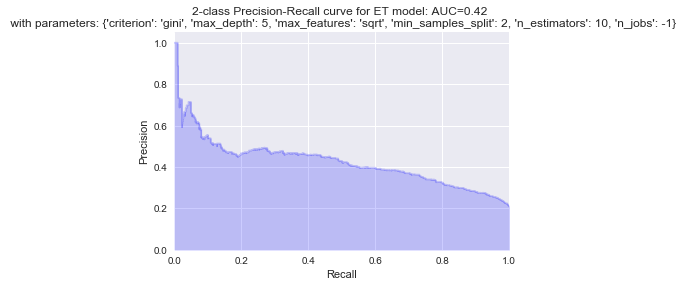

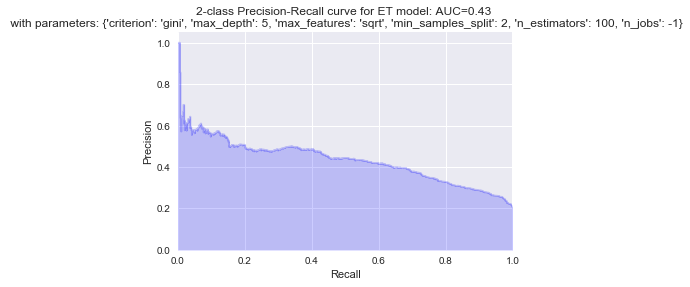

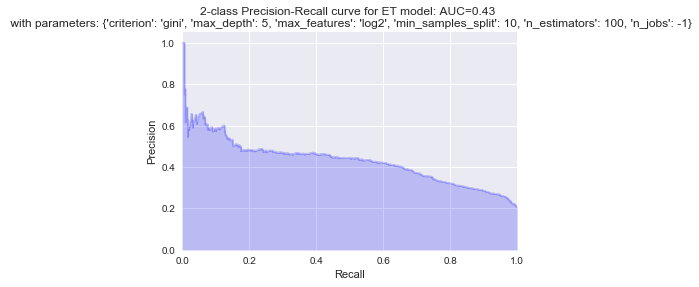

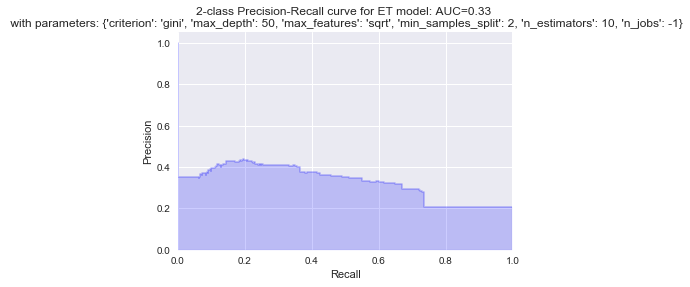

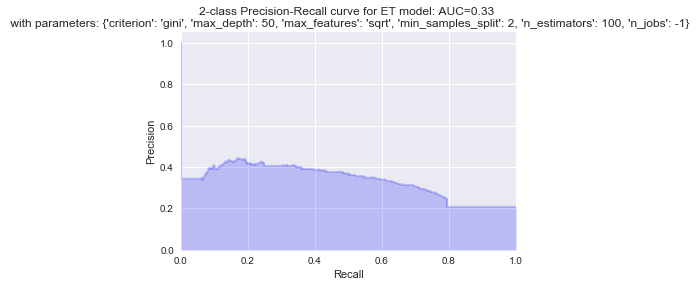

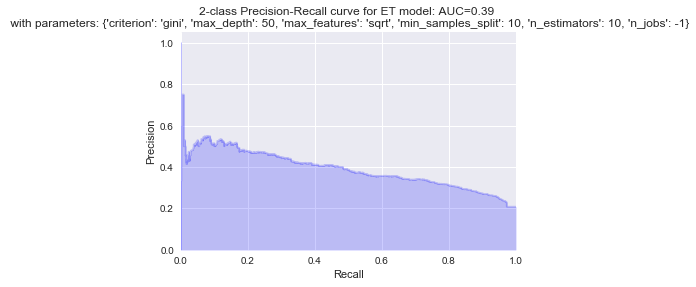

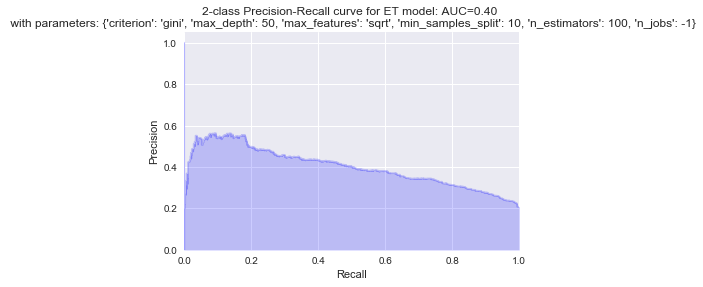

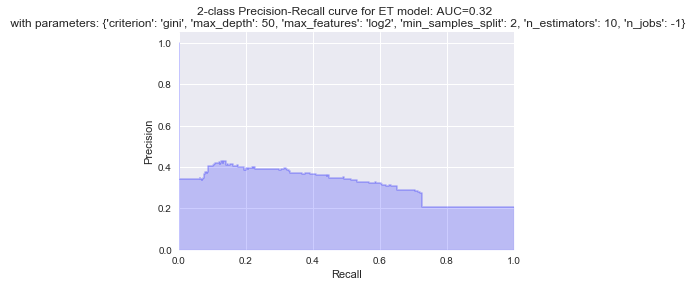

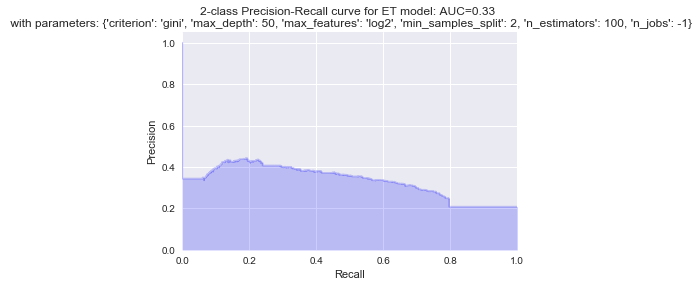

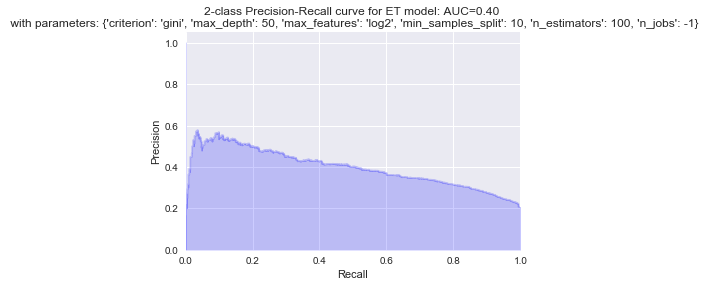

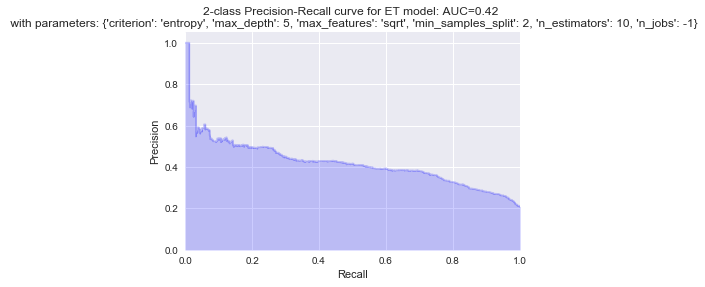

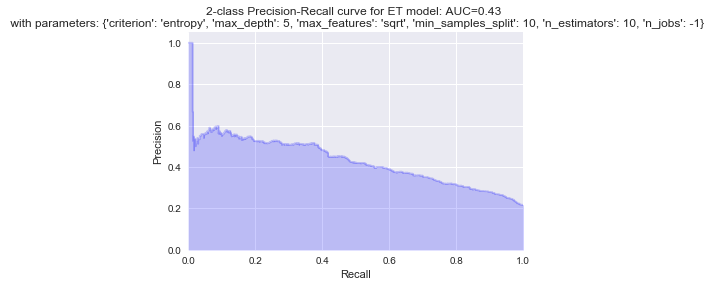

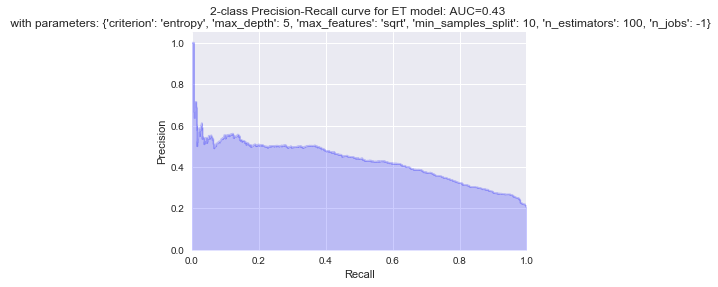

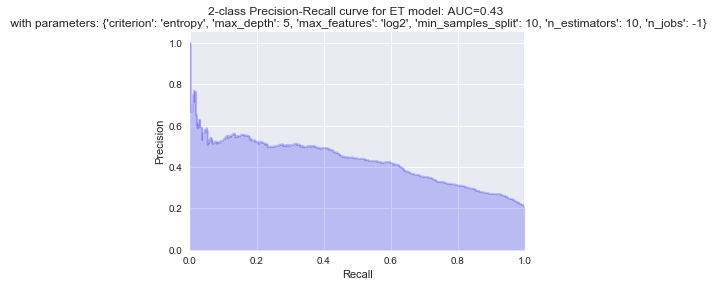

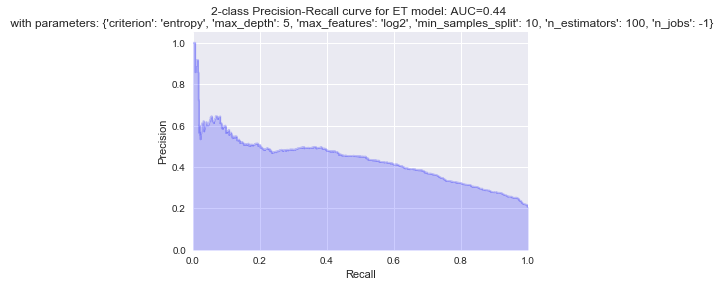

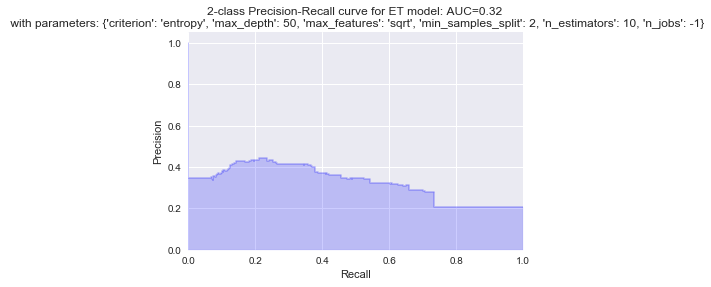

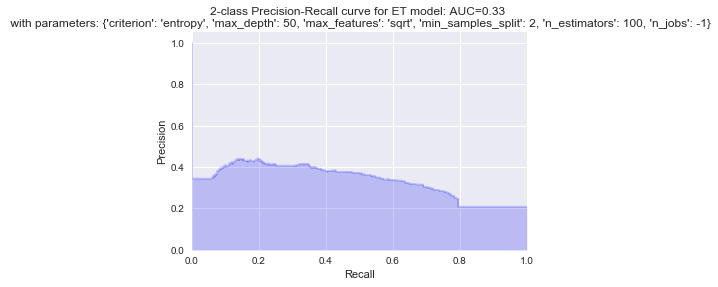

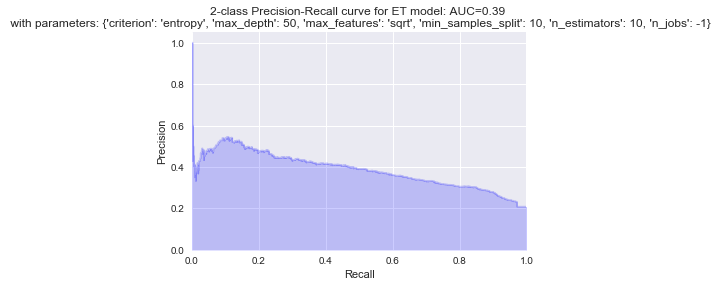

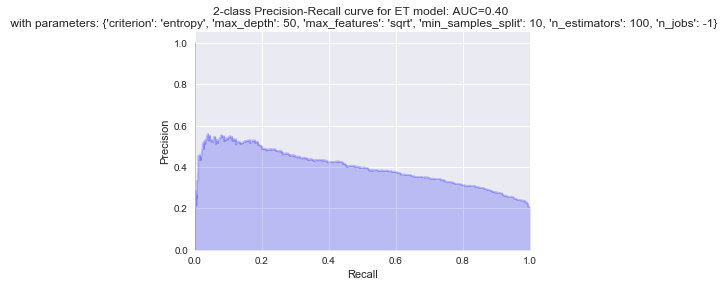

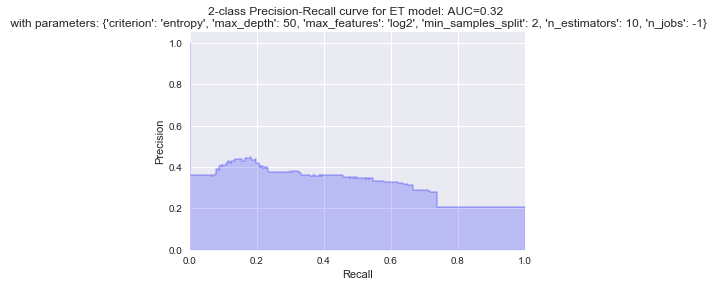

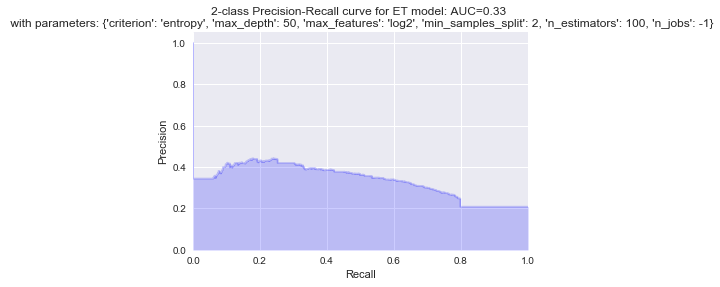

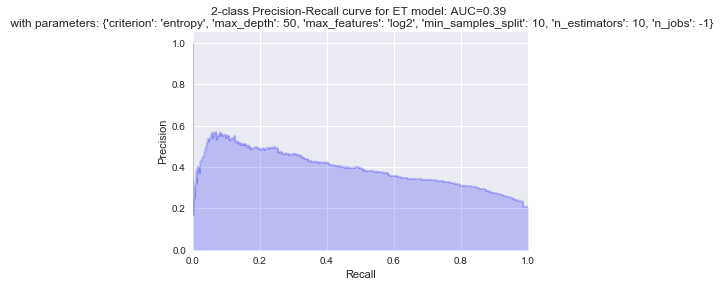

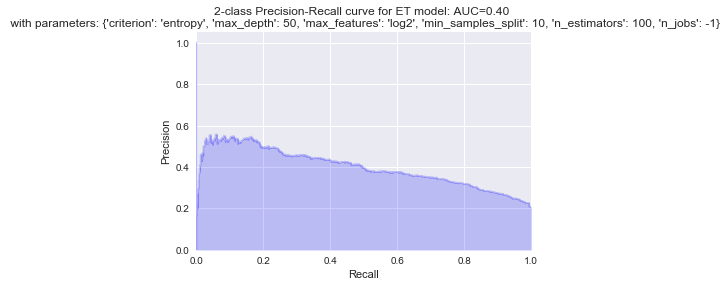

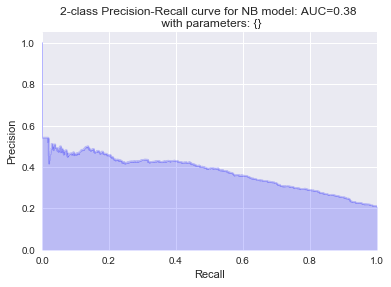

In [51]:
results = clf_loop(["RF", "Boost", "Bag", "Logit", "Tree",  "ET", "NB"], x_train, x_test, y_train, y_test)

In [209]:
from IPython.display import display
display(results)

model_type                                         parameters  accuracy  \
0           RF  {'max_depth': 5, 'max_features': 'sqrt', 'min_...    0.7942   
1           RF  {'max_depth': 5, 'max_features': 'sqrt', 'min_...    0.7934   
2           RF  {'max_depth': 5, 'max_features': 'sqrt', 'min_...    0.7916   
3           RF  {'max_depth': 5, 'max_features': 'sqrt', 'min_...    0.7934   
4           RF  {'max_depth': 5, 'max_features': 'log2', 'min_...    0.7919   
5           RF  {'max_depth': 5, 'max_features': 'log2', 'min_...    0.7919   
6           RF  {'max_depth': 5, 'max_features': 'log2', 'min_...    0.7925   
7           RF  {'max_depth': 5, 'max_features': 'log2', 'min_...    0.7919   
8           RF  {'max_depth': 50, 'max_features': 'sqrt', 'min...    0.7705   
9           RF  {'max_depth': 50, 'max_features': 'sqrt', 'min...    0.7834   
10          RF  {'max_depth': 50, 'max_features': 'sqrt', 'min...    0.7948   
11          RF  {'max_depth': 50, 'max_features': 'sqrt', 'min...    0.7963   
12          RF  {'max_depth': 50, 'max_features': 'log2', 'min...    0.7772   
13          RF  {'max_depth': 50, 'max_features': 'log2', 'min...    0.7822   
14          RF  {'max_depth': 50, 'max_features': 'log2', 'min...    0.7922   
15          RF  {'max_depth': 50, 'max_features': 'log2', 'min...    0.7972   
16       Boost          {'algorithm': 'SAMME', 'n_estimators': 1}    0.7755   
17       Boost         {'algorithm': 'SAMME', 'n_estimators': 10}    0.7857   
18       Boost        {'algorithm': 'SAMME', 'n_estimators': 100}    0.7840   
19       Boost       {'algorithm': 'SAMME', 'n_estimators': 1000}    0.7869   
20       Boost        {'algorithm': 'SAMME.R', 'n_estimators': 1}    0.7755   
21       Boost       {'algorithm': 'SAMME.R', 'n_estimators': 10}    0.7846   
22       Boost      {'algorithm': 'SAMME.R', 'n_estimators': 100}    0.7849   
23       Boost     {'algorithm': 'SAMME.R', 'n_estimators': 1000}    0.7857   
24         Bag  {'max_features': 5, 'max_samples': 5, 'n_estim...    0.7919   
25         Bag  {'max_features': 5, 'max_samples': 5, 'n_estim...    0.7919   
26         Bag  {'max_features': 5, 'max_samples': 5, 'n_estim...    0.7919   
27         Bag  {'max_features': 5, 'max_samples': 5, 'n_estim...    0.7919   
28         Bag  {'max_features': 5, 'max_samples': 10, 'n_esti...    0.7517   
29         Bag  {'max_features': 5, 'max_samples': 10, 'n_esti...    0.7919   
..         ...                                                ...       ...   
85          ET  {'criterion': 'gini', 'max_depth': 5, 'max_fea...    0.7934   
86          ET  {'criterion': 'gini', 'max_depth': 5, 'max_fea...    0.7922   
87          ET  {'criterion': 'gini', 'max_depth': 5, 'max_fea...    0.7919   
88          ET  {'criterion': 'gini', 'max_depth': 5, 'max_fea...    0.7919   
89          ET  {'criterion': 'gini', 'max_depth': 5, 'max_fea...    0.7919   
90          ET  {'criterion': 'gini', 'max_depth': 50, 'max_fe...    0.7828   
91          ET  {'criterion': 'gini', 'max_depth': 50, 'max_fe...    0.7854   
92          ET  {'criterion': 'gini', 'max_depth': 50, 'max_fe...    0.7957   
93          ET  {'criterion': 'gini', 'max_depth': 50, 'max_fe...    0.7928   
94          ET  {'criterion': 'gini', 'max_depth': 50, 'max_fe...    0.7784   
95          ET  {'criterion': 'gini', 'max_depth': 50, 'max_fe...    0.7854   
96          ET  {'criterion': 'gini', 'max_depth': 50, 'max_fe...    0.7934   
97          ET  {'criterion': 'gini', 'max_depth': 50, 'max_fe...    0.7907   
98          ET  {'criterion': 'entropy', 'max_depth': 5, 'max_...    0.7934   
99          ET  {'criterion': 'entropy', 'max_depth': 5, 'max_...    0.7934   
100         ET  {'criterion': 'entropy', 'max_depth': 5, 'max_...    0.7940   
101         ET  {'criterion': 'entropy', 'max_depth': 5, 'max_...    0.7934   
102         ET  {'criterion': 'entropy', 'max_depth': 5, 'max_...    0.7919   
103         ET  {'criterion': 'entropy', 'max_depth': 

In [52]:
best =results.groupby('model_type')['auc-roc'].nlargest(1)

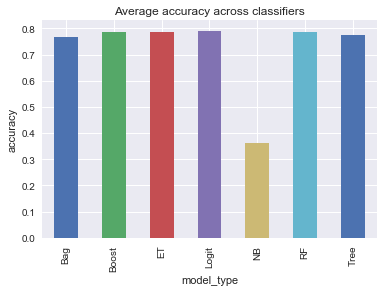

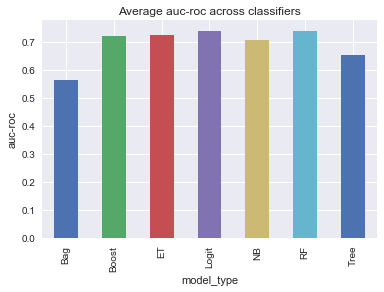

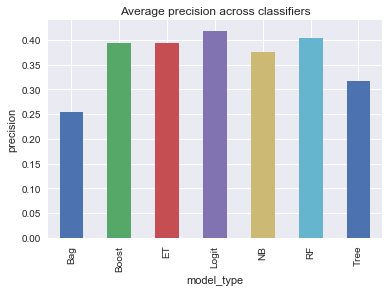

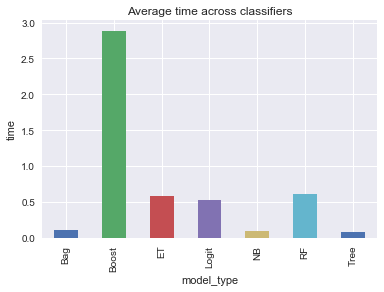

In [53]:
for item in ['accuracy', 'auc-roc','precision','time']:
    plt.figure()
    results.groupby(['model_type'])[item].mean().plot(kind='bar', title='Average '+item+' across classifiers')
    plt.ylabel(item)

In [54]:
list(best)

[0.6381, 0.7568, 0.7606, 0.7583, 0.707, 0.7633, 0.7164]

In [55]:
best

model_type     
Bag         39     0.6381
Boost       22     0.7568
ET          99     0.7606
Logit       44     0.7583
NB          114    0.7070
RF          2      0.7633
Tree        54     0.7164
Name: auc-roc, dtype: float64

In [56]:
results.loc[[25,22,99,44,114,3,57]].iloc[:,0:6]

model_type                                         parameters  accuracy  \
25         Bag  {'max_features': 5, 'max_samples': 5, 'n_estim...    0.7913   
22       Boost      {'algorithm': 'SAMME.R', 'n_estimators': 100}    0.7907   
99          ET  {'criterion': 'entropy', 'max_depth': 5, 'max_...    0.7925   
44       Logit                        {'C': 0.1, 'penalty': 'l1'}    0.7910   
114         NB                                                 {}    0.3628   
3           RF  {'max_depth': 5, 'max_features': 'sqrt', 'min_...    0.7940   
57        Tree  {'criterion': 'gini', 'max_depth': 10, 'max_fe...    0.7810   

     auc-roc  precision    time  
25    0.5222     0.2233  0.0823  
22    0.7568     0.4272  1.1417  
99    0.7606     0.4345  0.5498  
44    0.7583     0.4340  0.5239  
114   0.7070     0.3753  0.1001  
3     0.7601     0.4323  0.6358  
57    0.6784     0.3339  0.0664

In [57]:
rows = [25,22,99,44,114,3,57]

In [58]:
best = {}
for row in rows:
    best[results.loc[row]["model_type"]]=results.loc[row]["parameters"]

In [59]:
for k,arg in best.items():
    for key,val in arg.items():
        arg[key] = [val]

In [60]:
for k, arg in best.items():
    print(arg)

{'max_features': [5], 'max_samples': [5], 'n_estimators': [10]}
{'algorithm': ['SAMME.R'], 'n_estimators': [100]}
{'criterion': ['entropy'], 'max_depth': [5], 'max_features': ['sqrt'], 'min_samples_split': [2], 'n_estimators': [100], 'n_jobs': [-1]}
{'C': [0.1], 'penalty': ['l1']}
{}
{'max_depth': [5], 'max_features': ['sqrt'], 'min_samples_split': [10], 'n_estimators': [100]}
{'criterion': ['gini'], 'max_depth': [10], 'max_features': ['log2'], 'min_samples_split': [5]}


In [61]:
def plot_best(models, x_train, x_test, y_train, y_test, bestm = best):
    '''
    Run model with the best given params on x and y
    and print out the scores for comparison
    '''
    for index, clf in enumerate([clfs[x] for x in models]):
        model_params = bestm[models[index]]
        for p in ParameterGrid(model_params):
            try:
                clf.set_params(**p)
                y_pred_probs = clf.fit(x_train, y_train).predict_proba(x_test)[:,1]
                plot_precision_recall_n(y_test, y_pred_probs, models[index],p)
                
            except IndexError as e:
                print(e)
                continue
    plt.show()

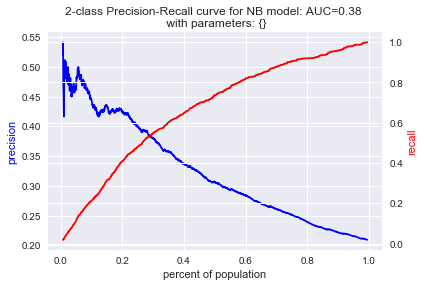

In [62]:
plot_best(["RF", "Boost", "Bag", "Logit", "Tree",  "ET", "NB"], x_train, x_test, y_train, y_test)

In [63]:
#Printing out the best decision tree
dt = DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt', min_samples_split=5)

In [64]:
tree = dt.fit(x_train, y_train)

In [65]:
tree_viz = export_graphviz(tree, out_file=None, feature_names=indepv, rounded=True, filled=True)
graph =graphviz.Source(tree_viz)

In [66]:
graph

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [55]:
#Running classifiers to predict if the person re-enter within two years

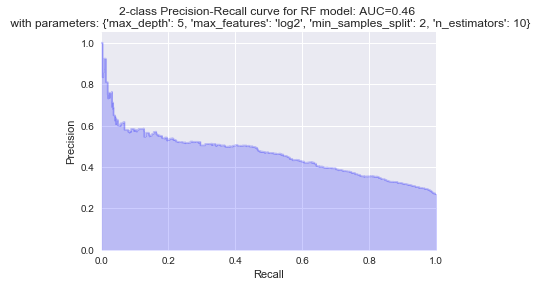

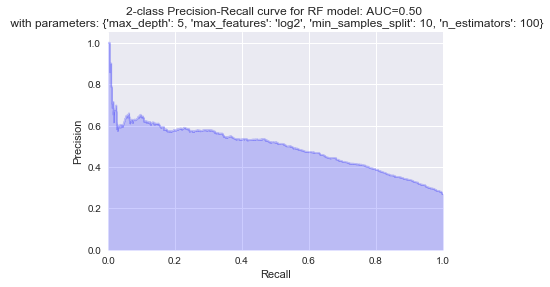

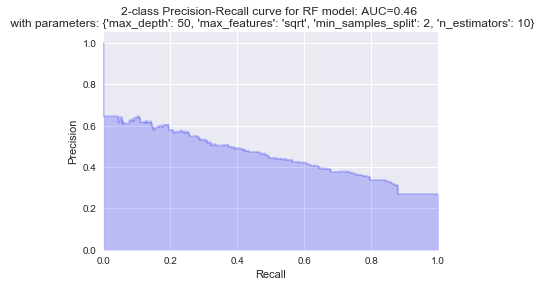

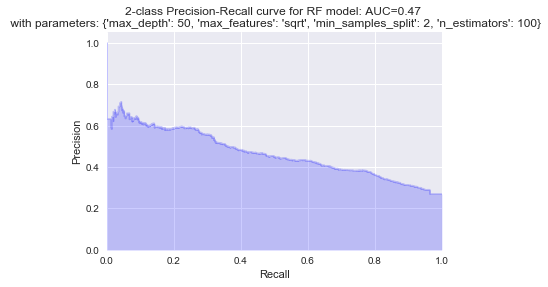

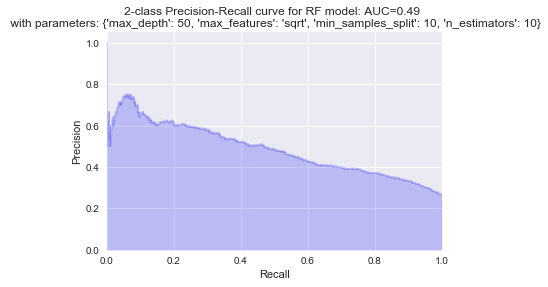

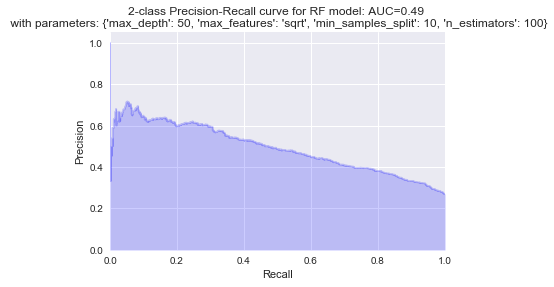

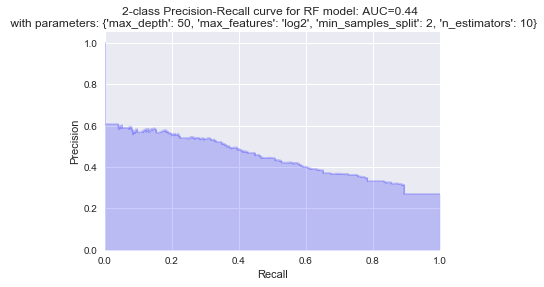

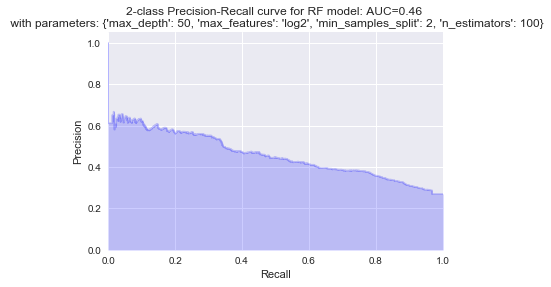

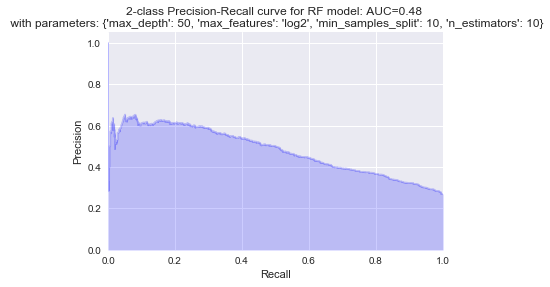

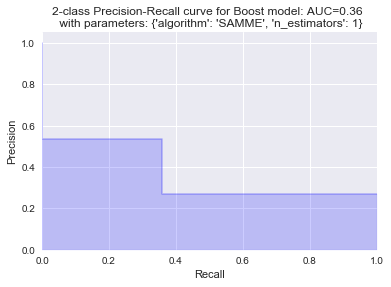

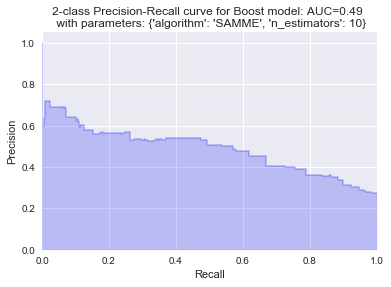

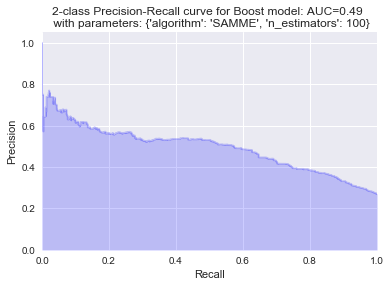

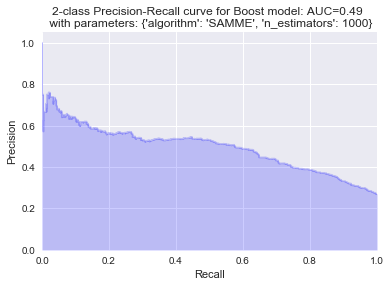

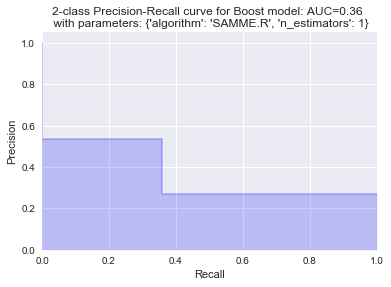

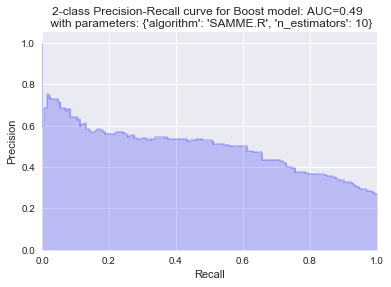

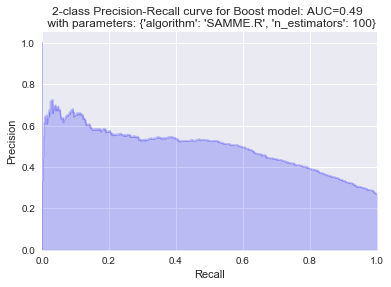

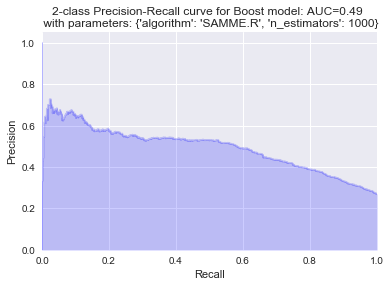

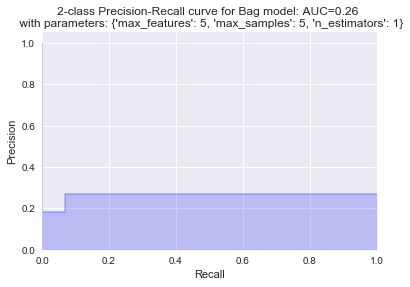

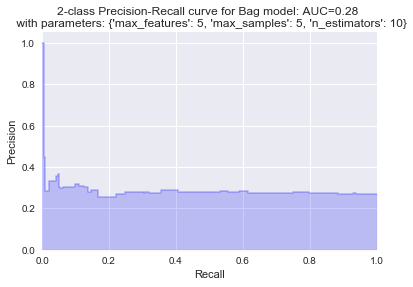

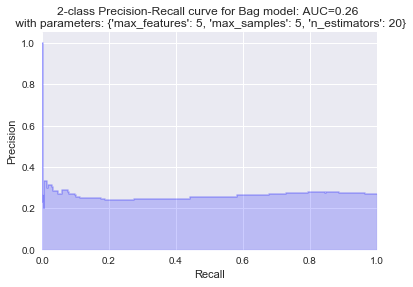

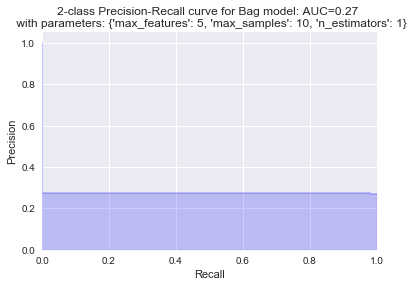

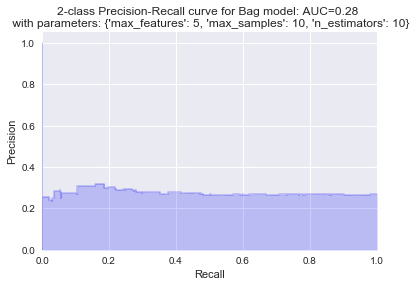

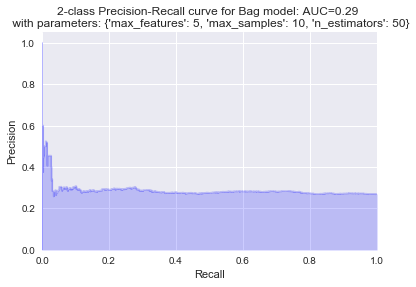

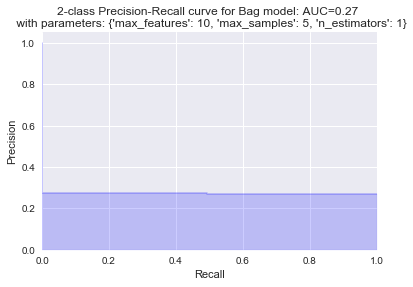

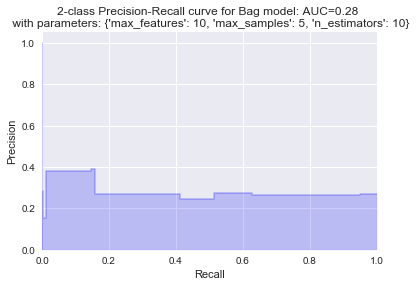

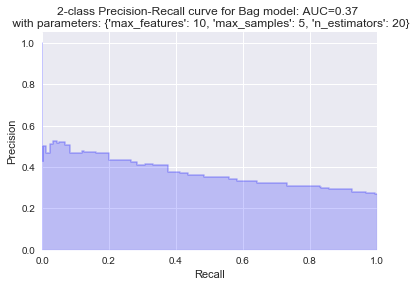

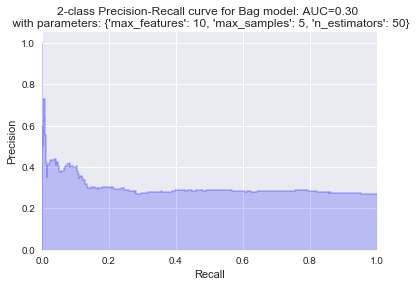

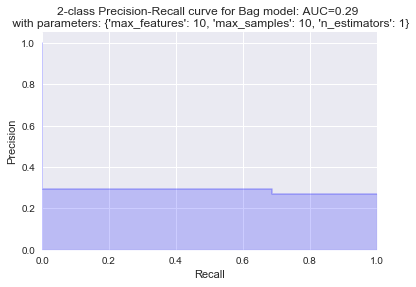

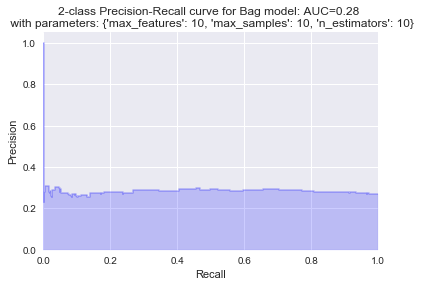

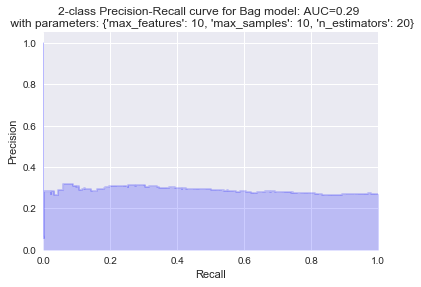

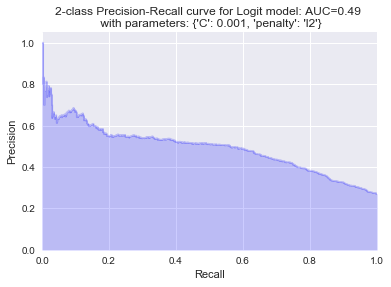

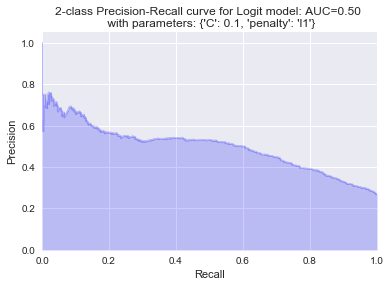

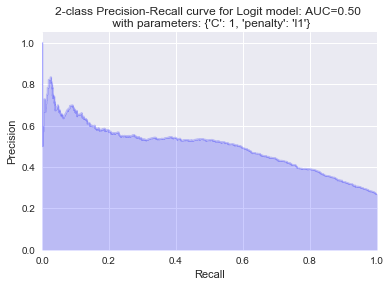

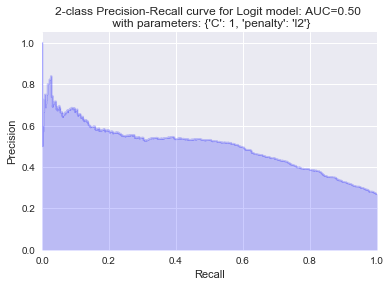

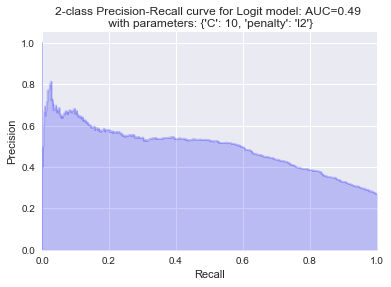

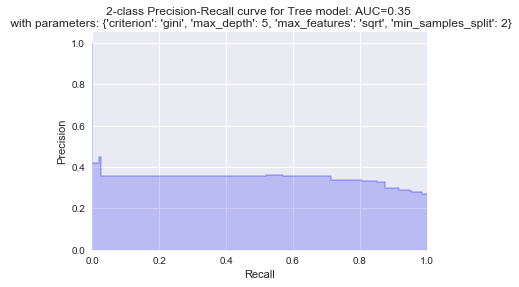

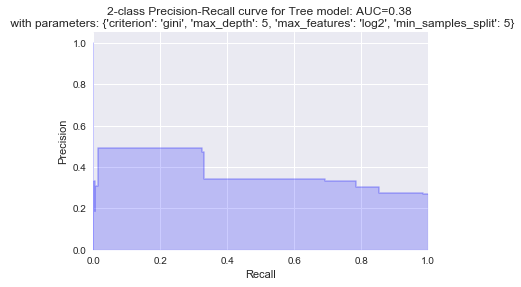

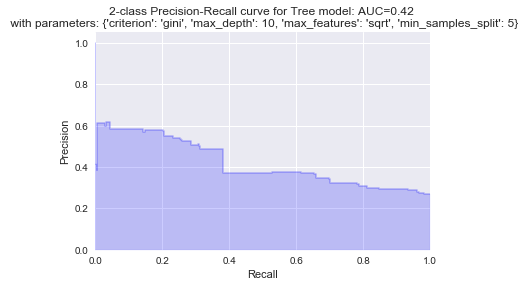

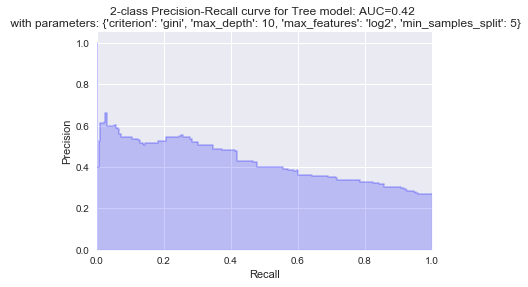

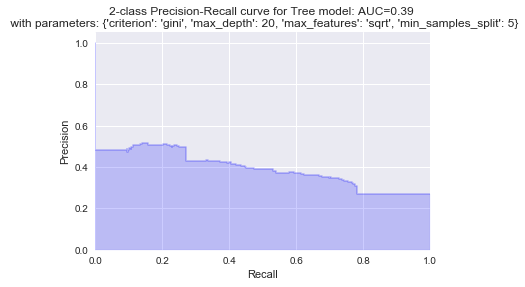

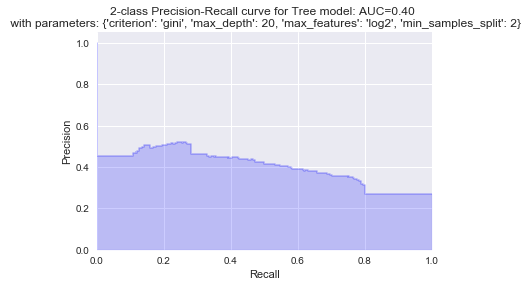

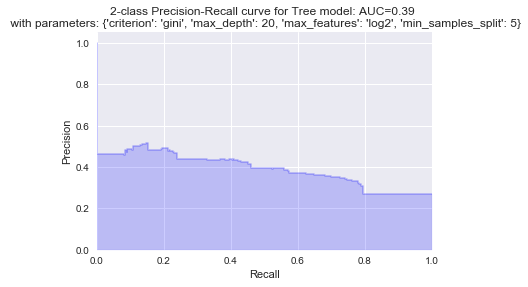

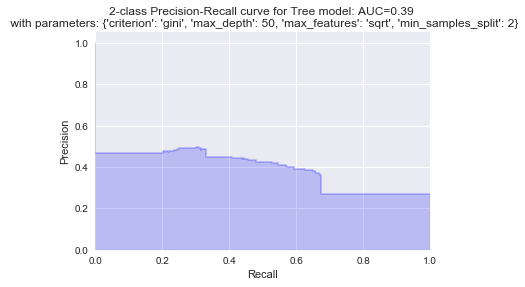

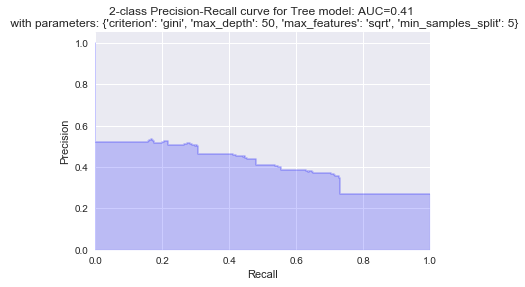

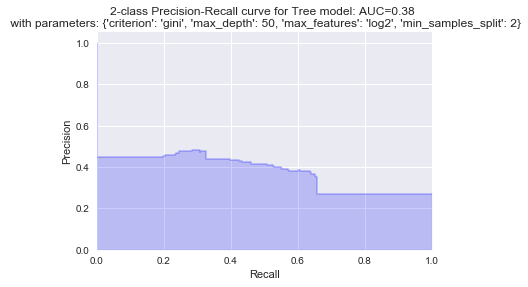

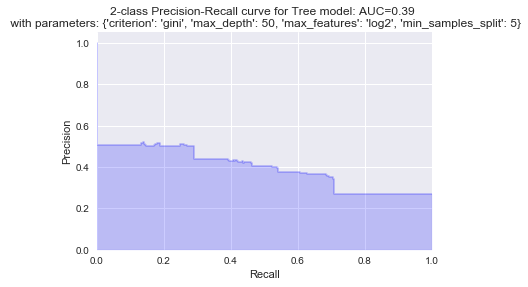

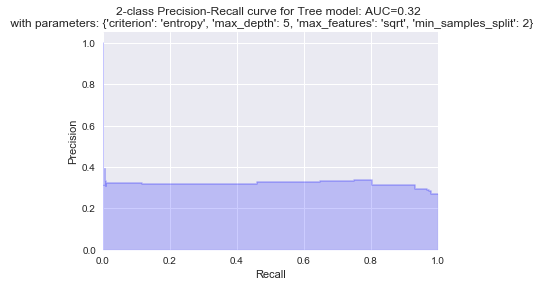

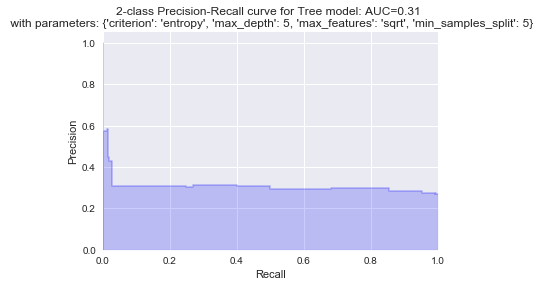

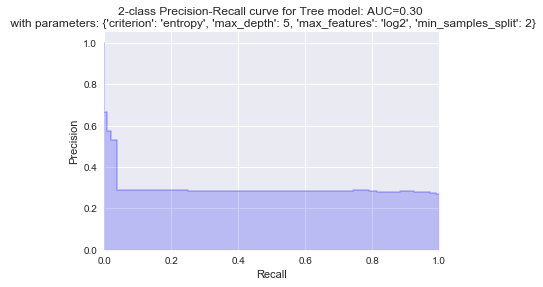

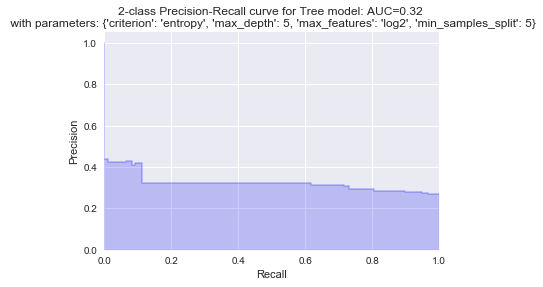

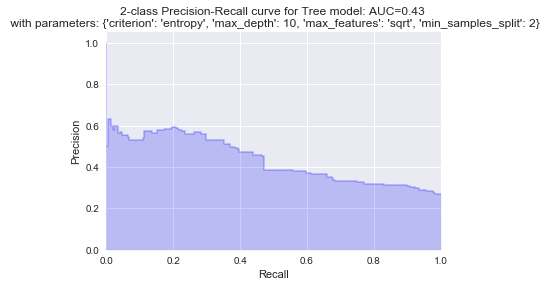

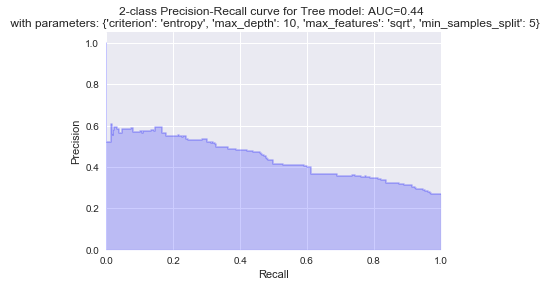

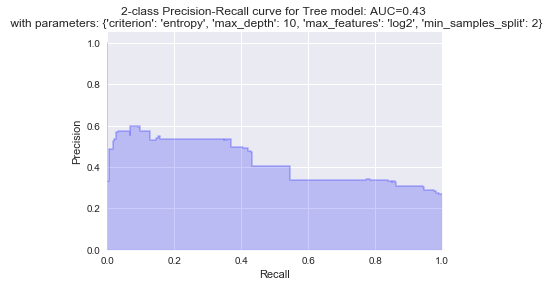

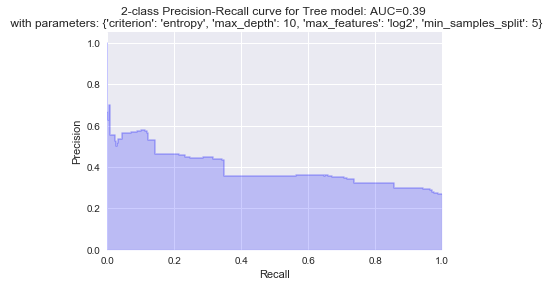

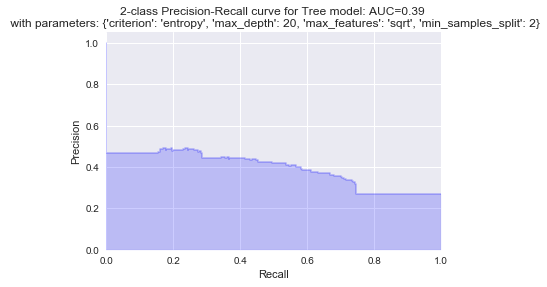

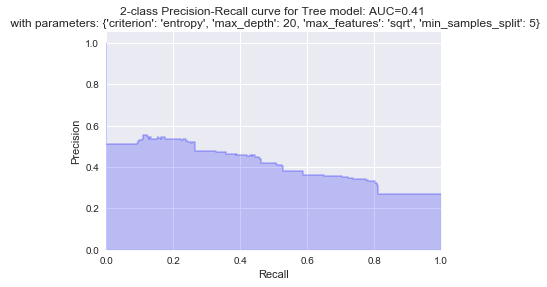

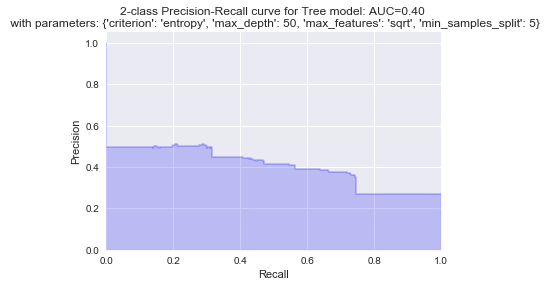

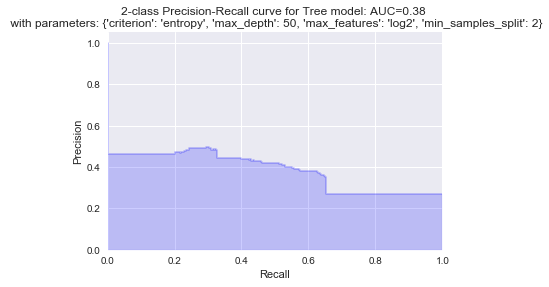

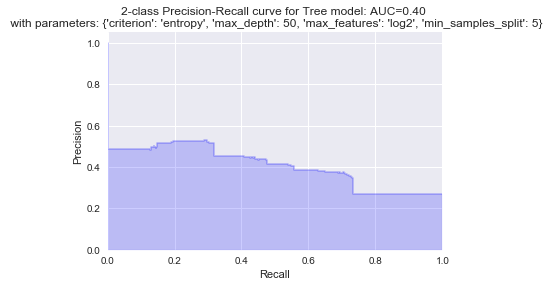

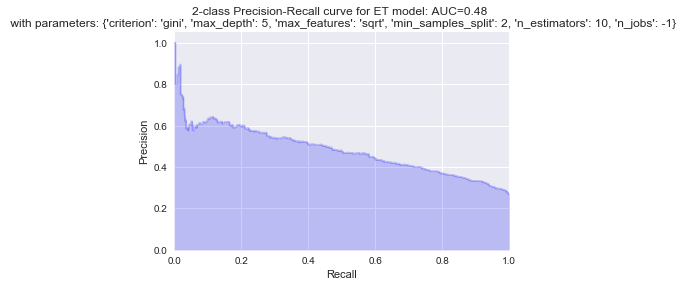

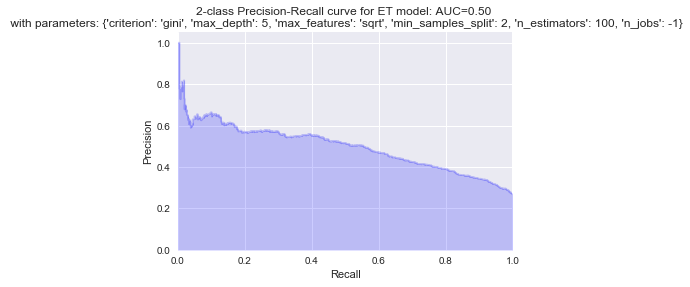

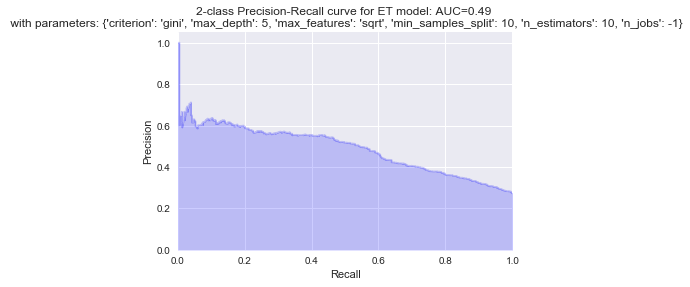

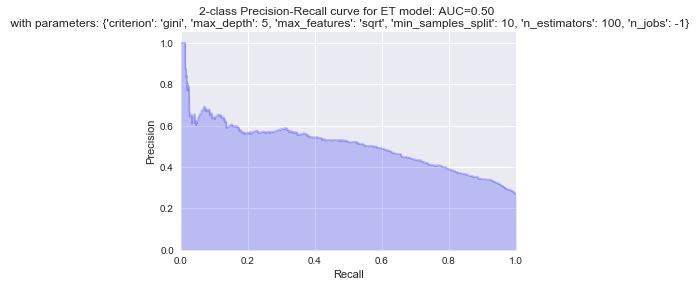

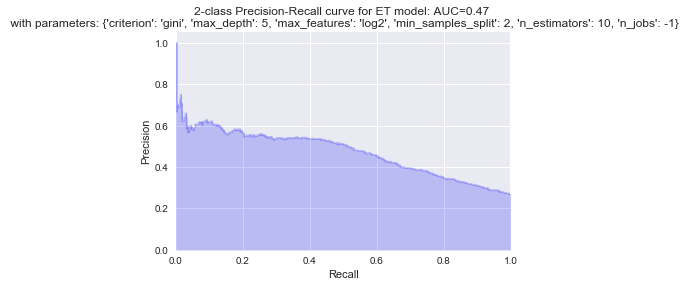

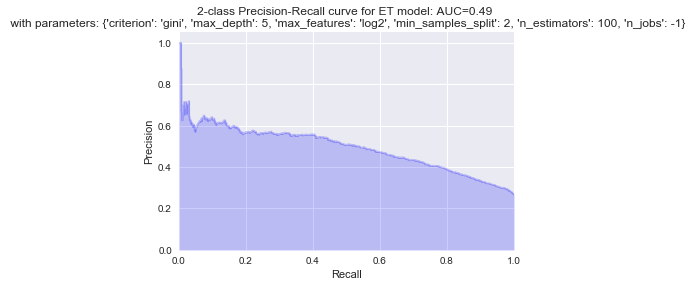

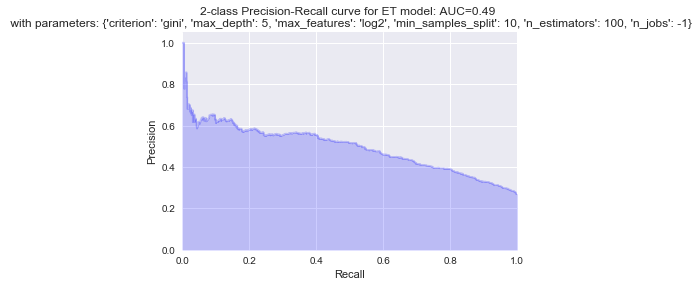

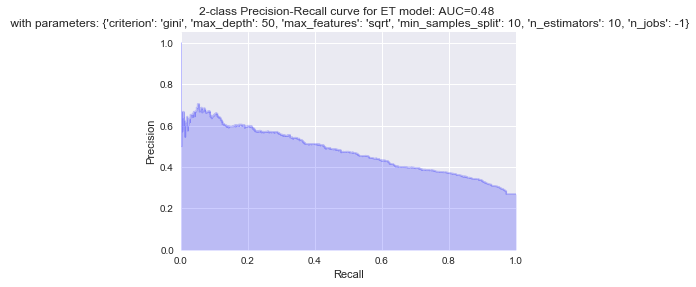

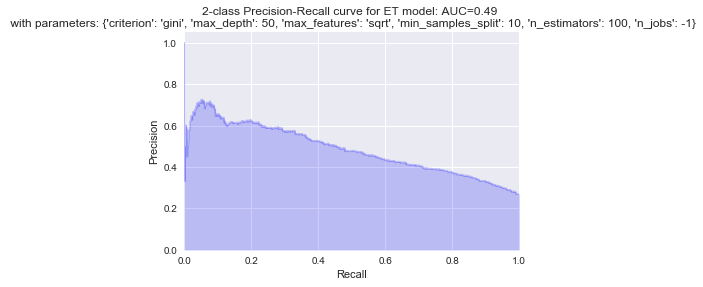

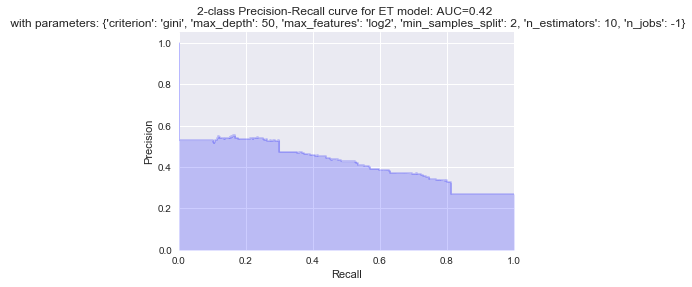

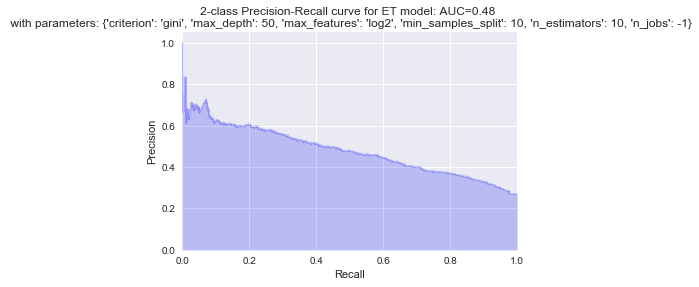

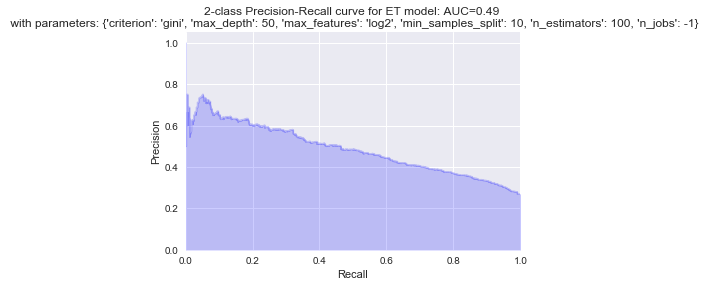

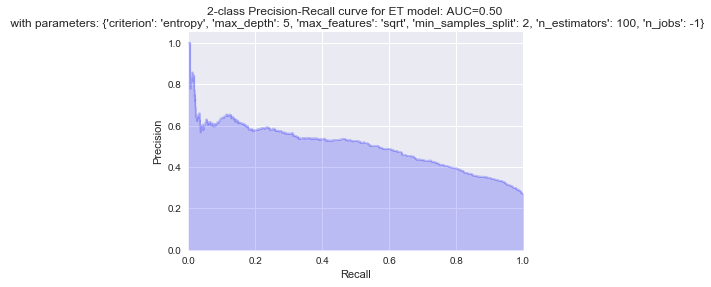

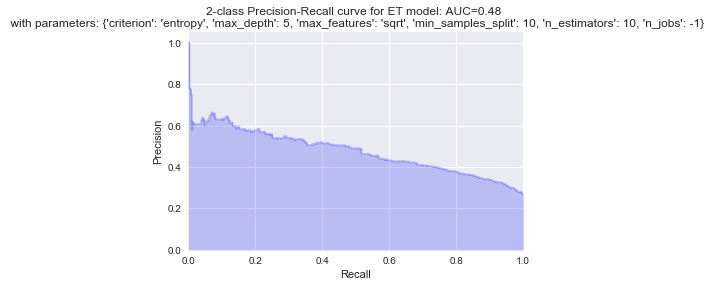

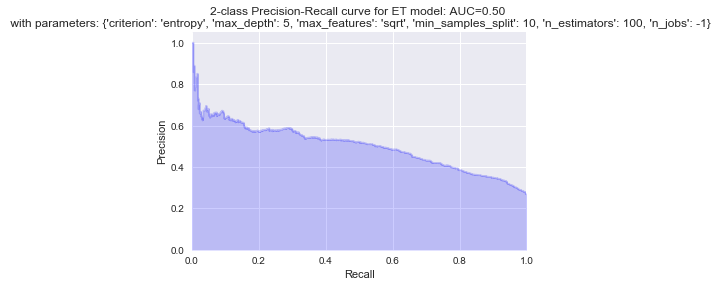

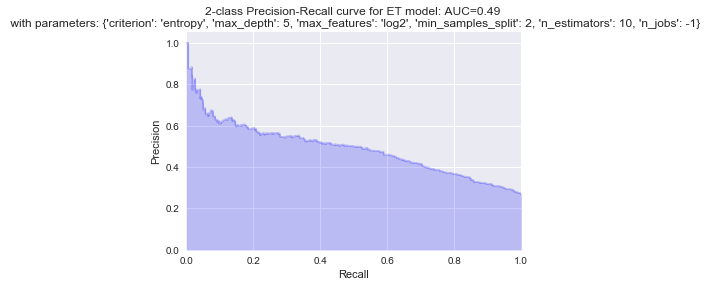

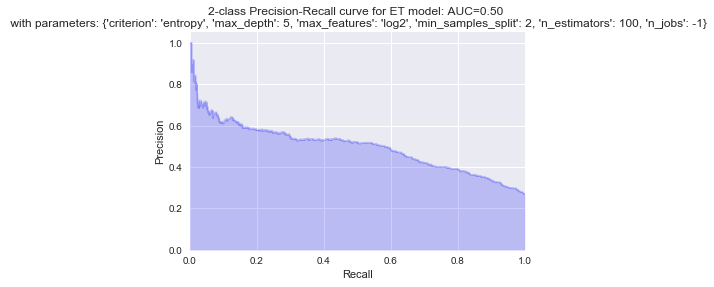

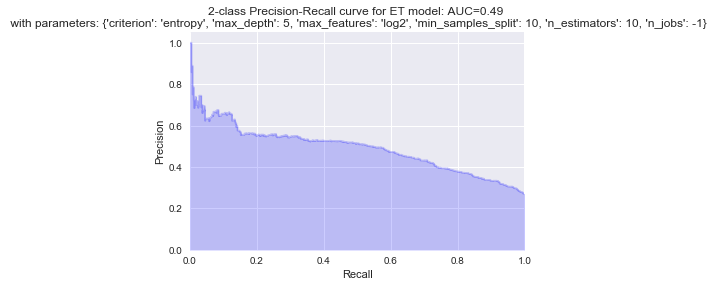

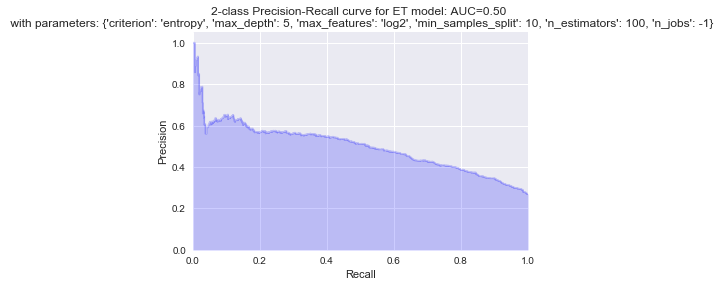

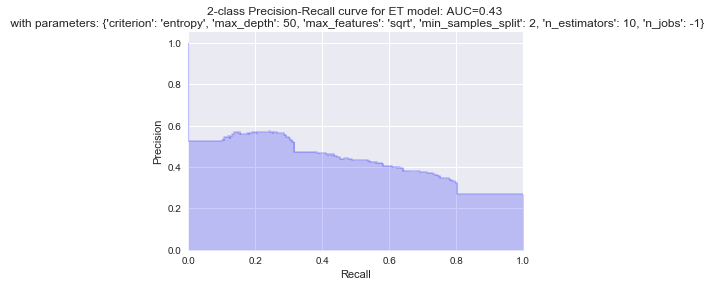

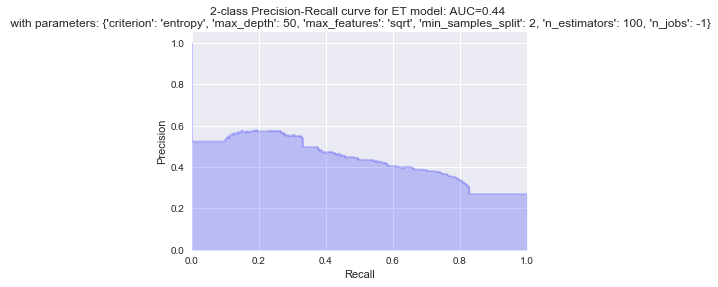

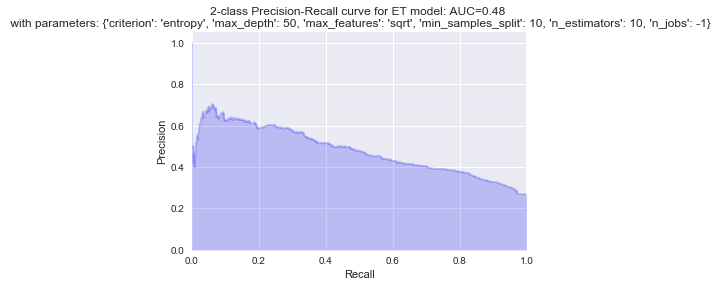

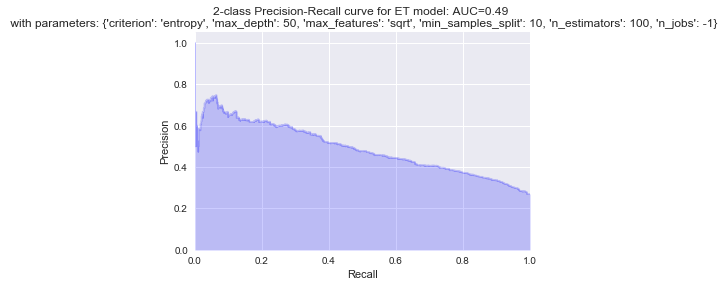

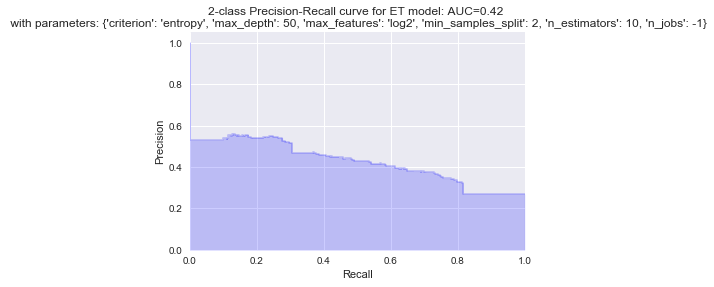

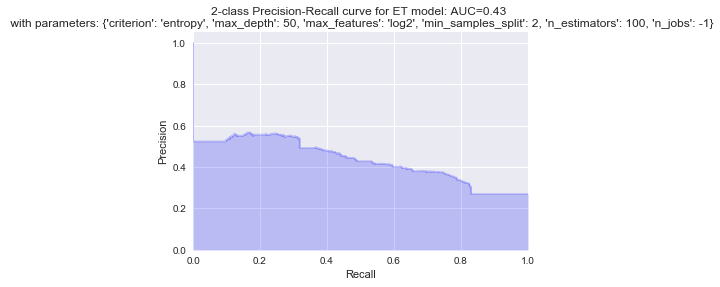

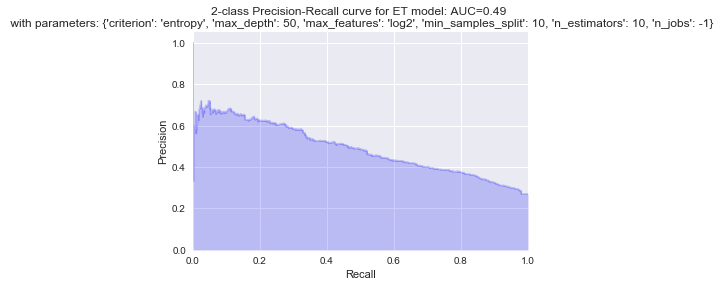

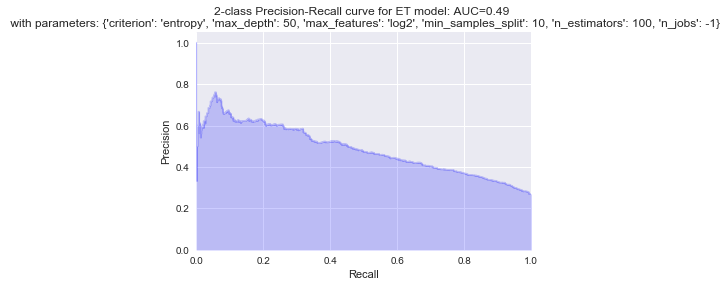

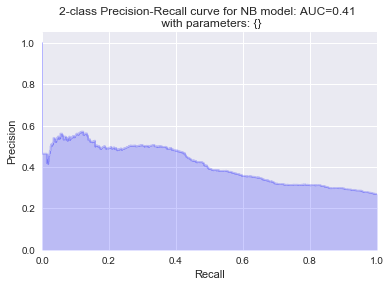

In [224]:
results2 = clf_loop(["RF", "Boost", "Bag", "Logit", "Tree",  "ET", "NB"], x_train, x_test, y_train2, y_test2)

In [226]:
from IPython.display import display
display(results2)

model_type                                         parameters  accuracy  \
0           RF  {'max_depth': 5, 'max_features': 'sqrt', 'min_...    0.7353   
1           RF  {'max_depth': 5, 'max_features': 'sqrt', 'min_...    0.7361   
2           RF  {'max_depth': 5, 'max_features': 'sqrt', 'min_...    0.7358   
3           RF  {'max_depth': 5, 'max_features': 'sqrt', 'min_...    0.7385   
4           RF  {'max_depth': 5, 'max_features': 'log2', 'min_...    0.7341   
5           RF  {'max_depth': 5, 'max_features': 'log2', 'min_...    0.7323   
6           RF  {'max_depth': 5, 'max_features': 'log2', 'min_...    0.7429   
7           RF  {'max_depth': 5, 'max_features': 'log2', 'min_...    0.7317   
8           RF  {'max_depth': 50, 'max_features': 'sqrt', 'min...    0.7323   
9           RF  {'max_depth': 50, 'max_features': 'sqrt', 'min...    0.7361   
10          RF  {'max_depth': 50, 'max_features': 'sqrt', 'min...    0.7479   
11          RF  {'max_depth': 50, 'max_features': 'sqrt', 'min...    0.7523   
12          RF  {'max_depth': 50, 'max_features': 'log2', 'min...    0.7402   
13          RF  {'max_depth': 50, 'max_features': 'log2', 'min...    0.7423   
14          RF  {'max_depth': 50, 'max_features': 'log2', 'min...    0.7520   
15          RF  {'max_depth': 50, 'max_features': 'log2', 'min...    0.7508   
16       Boost          {'algorithm': 'SAMME', 'n_estimators': 1}    0.7432   
17       Boost         {'algorithm': 'SAMME', 'n_estimators': 10}    0.7423   
18       Boost        {'algorithm': 'SAMME', 'n_estimators': 100}    0.7435   
19       Boost       {'algorithm': 'SAMME', 'n_estimators': 1000}    0.7411   
20       Boost        {'algorithm': 'SAMME.R', 'n_estimators': 1}    0.7432   
21       Boost       {'algorithm': 'SAMME.R', 'n_estimators': 10}    0.7420   
22       Boost      {'algorithm': 'SAMME.R', 'n_estimators': 100}    0.7432   
23       Boost     {'algorithm': 'SAMME.R', 'n_estimators': 1000}    0.7435   
24         Bag  {'max_features': 5, 'max_samples': 5, 'n_estim...    0.6663   
25         Bag  {'max_features': 5, 'max_samples': 5, 'n_estim...    0.7308   
26         Bag  {'max_features': 5, 'max_samples': 5, 'n_estim...    0.7308   
27         Bag  {'max_features': 5, 'max_samples': 5, 'n_estim...    0.7308   
28         Bag  {'max_features': 5, 'max_samples': 10, 'n_esti...    0.7308   
29         Bag  {'max_features': 5, 'max_samples': 10, 'n_esti...    0.7047   
..         ...                                                ...       ...   
85          ET  {'criterion': 'gini', 'max_depth': 5, 'max_fea...    0.7408   
86          ET  {'criterion': 'gini', 'max_depth': 5, 'max_fea...    0.7308   
87          ET  {'criterion': 'gini', 'max_depth': 5, 'max_fea...    0.7323   
88          ET  {'criterion': 'gini', 'max_depth': 5, 'max_fea...    0.7320   
89          ET  {'criterion': 'gini', 'max_depth': 5, 'max_fea...    0.7323   
90          ET  {'criterion': 'gini', 'max_depth': 50, 'max_fe...    0.7391   
91          ET  {'criterion': 'gini', 'max_depth': 50, 'max_fe...    0.7423   
92          ET  {'criterion': 'gini', 'max_depth': 50, 'max_fe...    0.7479   
93          ET  {'criterion': 'gini', 'max_depth': 50, 'max_fe...    0.7534   
94          ET  {'criterion': 'gini', 'max_depth': 50, 'max_fe...    0.7394   
95          ET  {'criterion': 'gini', 'max_depth': 50, 'max_fe...    0.7411   
96          ET  {'criterion': 'gini', 'max_depth': 50, 'max_fe...    0.7470   
97          ET  {'criterion': 'gini', 'max_depth': 50, 'max_fe...    0.7529   
98          ET  {'criterion': 'entropy', 'max_depth': 5, 'max_...    0.7350   
99          ET  {'criterion': 'entropy', 'max_depth': 5, 'max_...    0.7353   
100         ET  {'criterion': 'entropy', 'max_depth': 5, 'max_...    0.7344   
101         ET  {'criterion': 'entropy', 'max_depth': 5, 'max_...    0.7438   
102         ET  {'criterion': 'entropy', 'max_depth': 5, 'max_...    0.7344   
103         ET  {'criterion': 'entropy', 'max_depth': 

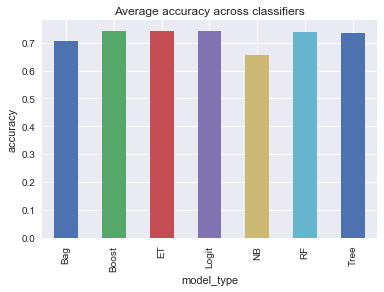

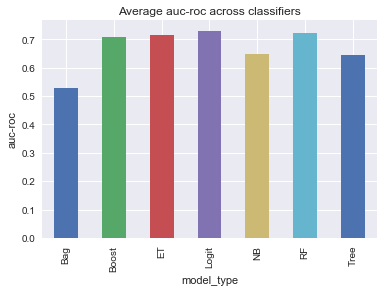

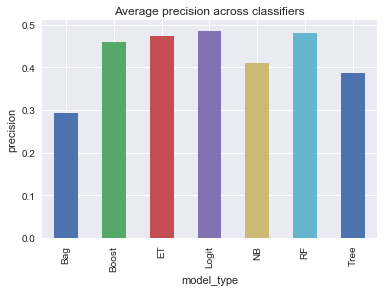

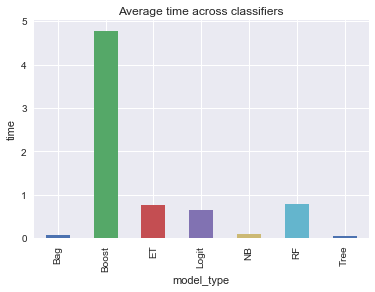

In [227]:
for item in ['accuracy', 'auc-roc','precision','time']:
    plt.figure()
    results2.groupby(['model_type'])[item].mean().plot(kind='bar', title='Average '+item+' across classifiers')
    plt.ylabel(item)

In [229]:
models2 =results2.groupby('model_type')['auc-roc'].nlargest(1)

In [230]:
models2

model_type     
Bag         34     0.6263
Boost       22     0.7395
ET          98     0.7464
Logit       44     0.7390
NB          114    0.6491
RF          1      0.7424
Tree        54     0.7075
Name: auc-roc, dtype: float64

In [231]:
results2.loc[[34,22,98,44,114,1,54]].iloc[:,0:6]

model_type                                         parameters  accuracy  \
34         Bag  {'max_features': 10, 'max_samples': 5, 'n_esti...    0.7308   
22       Boost      {'algorithm': 'SAMME.R', 'n_estimators': 100}    0.7432   
98          ET  {'criterion': 'entropy', 'max_depth': 5, 'max_...    0.7350   
44       Logit                        {'C': 0.1, 'penalty': 'l1'}    0.7405   
114         NB                                                 {}    0.6575   
1           RF  {'max_depth': 5, 'max_features': 'sqrt', 'min_...    0.7361   
54        Tree  {'criterion': 'gini', 'max_depth': 10, 'max_fe...    0.7417   

     auc-roc  precision    time  
34    0.6263     0.3728  0.0599  
22    0.7395     0.4926  1.6745  
98    0.7464     0.4973  0.3587  
44    0.7390     0.4976  0.4737  
114   0.6491     0.4099  0.0869  
1     0.7424     0.5004  0.6538  
54    0.7075     0.4567  0.0267

In [232]:
rows2 = [34,22,98,44,114,1,54]

In [233]:
best2 = {}
for row in rows2:
    best2[results2.loc[row]["model_type"]]=results2.loc[row]["parameters"]

In [234]:
best2

{'Bag': {'max_features': 10, 'max_samples': 5, 'n_estimators': 20},
 'Boost': {'algorithm': 'SAMME.R', 'n_estimators': 100},
 'ET': {'criterion': 'entropy',
  'max_depth': 5,
  'max_features': 'sqrt',
  'min_samples_split': 2,
  'n_estimators': 10,
  'n_jobs': -1},
 'Logit': {'C': 0.1, 'penalty': 'l1'},
 'NB': {},
 'RF': {'max_depth': 5,
  'max_features': 'sqrt',
  'min_samples_split': 2,
  'n_estimators': 100},
 'Tree': {'criterion': 'gini',
  'max_depth': 10,
  'max_features': 'sqrt',
  'min_samples_split': 2}}

In [61]:
results2.loc[55]['parameters']

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_split': 5}

In [241]:
#plot_best(["RF", "Boost", "Bag", "Logit", "Tree",  "ET", "NB"], x_train, x_test, y_train2, y_test2, best2)

TypeError: 'int' object is not iterable

In [62]:
#Printing out the best decision tree
dt = DecisionTreeClassifier(criterion='gini', max_depth=10, max_features='sqrt', min_samples_split=5)

In [63]:
tree = dt.fit(x_train, y_train2)

In [64]:
tree_viz = export_graphviz(tree, out_file=None, feature_names=indepv, rounded=True, filled=True)
graph =graphviz.Source(tree_viz)

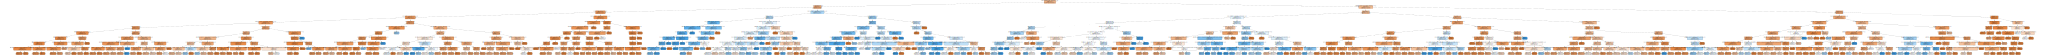

In [65]:
graph

Feature ranking:
2. mh_treatment (0.126780)
63. bail_amt_bin (0.000001)
1. bailed_out (0.202819)
50. per_capita_income_bin (0.000962)
54. school_enrollment_16-19_bin (0.000225)
62. rent_over_income_bin (0.000002)
58. military_service_bin (0.000042)
49. bail_typeSUR (0.000974)
55. own_children_under18_bin (0.000195)
17. case_typeCR (0.018279)
3. sexFEMALE (0.040236)
4. sexMALE (0.032269)
32. arresting_agencyOVERLAND PARK P.D. (0.010838)
7. raceBLACK OR AFRICAN AMERICAN (0.026941)
13. mar_statS (0.019226)
8. raceWHITE (0.024471)
18. case_typeDV (0.017781)
51. poverty_stat_bin (0.000768)
30. arresting_agencyOLATHE P.D. (0.012098)
59. education_25_bin (0.000040)
48. bail_typePR (0.001076)
57. grandparent_care_bin (0.000159)
11. mar_statM (0.021625)
19. case_typeJV (0.017621)
53. mortgage_stat_bin (0.000324)
60. property_value_occupied_bin (0.000014)
56. SSI_income_bin (0.000175)
61. retirement_income_bin (0.000005)
52. household_income_bin (0.000624)
10. mar_statD (0.023933)
27. arresting_

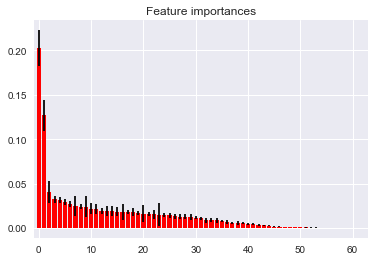

In [76]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(x_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in indices:
    print("%d. %s (%f)" % (f + 1, indepv[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xlim([-1, x_train.shape[1]])
plt.show()

Feature ranking:
2. mh_treatment (0.118803)
63. bail_amt_bin (0.000000)
49. bail_typeSUR (0.000908)
1. bailed_out (0.171431)
54. school_enrollment_16-19_bin (0.000273)
50. per_capita_income_bin (0.000868)
17. case_typeCR (0.020887)
13. mar_statS (0.022423)
3. sexFEMALE (0.044756)
62. rent_over_income_bin (0.000000)
7. raceBLACK OR AFRICAN AMERICAN (0.027672)
58. military_service_bin (0.000126)
11. mar_statM (0.023969)
55. own_children_under18_bin (0.000158)
4. sexMALE (0.038535)
8. raceWHITE (0.027518)
32. arresting_agencyOVERLAND PARK P.D. (0.010348)
19. case_typeJV (0.017761)
59. education_25_bin (0.000054)
51. poverty_stat_bin (0.000800)
30. arresting_agencyOLATHE P.D. (0.011226)
52. household_income_bin (0.000773)
48. bail_typePR (0.001242)
18. case_typeDV (0.019882)
57. grandparent_care_bin (0.000131)
60. property_value_occupied_bin (0.000027)
10. mar_statD (0.025326)
27. arresting_agencyLENEXA P.D. (0.012961)
53. mortgage_stat_bin (0.000426)
36. arresting_agencySHAWNEE P.D. (0.00

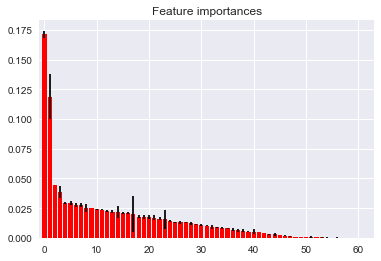

In [74]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(x_train, y_train2)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in indices:
    print("%d. %s (%f)" % (f + 1, indepv[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [69]:
indepv

['bailed_out',
 'mh_treatment',
 'sexFEMALE',
 'sexMALE',
 'raceAMERICAN INDIAN OR ALASKA NATIVE',
 'raceASIAN',
 'raceBLACK OR AFRICAN AMERICAN',
 'raceWHITE',
 'mar_statA',
 'mar_statD',
 'mar_statM',
 'mar_statN',
 'mar_statS',
 'mar_statU',
 'mar_statW',
 'mar_statY',
 'case_typeCR',
 'case_typeDV',
 'case_typeJV',
 'arresting_agencyFAIRWAY P.D.',
 'arresting_agencyGARDNER P.D.',
 'arresting_agencyJOHNSON COUNTY PARK PATROL',
 "arresting_agencyJOHNSON COUNTY SHERIFF'S DEPARTMENT",
 'arresting_agencyKANSAS HIGHWAY PATROL',
 'arresting_agencyLAKE QUIVIRA P.D.',
 'arresting_agencyLEAWOOD P.D.',
 'arresting_agencyLENEXA P.D.',
 'arresting_agencyMERRIAM P.D.',
 'arresting_agencyMISSION P.D.',
 'arresting_agencyOLATHE P.D.',
 'arresting_agencyOTHER AGENCY',
 'arresting_agencyOVERLAND PARK P.D.',
 'arresting_agencyPRAIRIE VILLAGE P.D.',
 'arresting_agencyROELAND PARK P.D.',
 'arresting_agencySHAWNEE MISSION SCHOOL SECURITY',
 'arresting_agencySHAWNEE P.D.',
 'arresting_agencySPRING HILL P